## Team :
1. Muhammad Fernanda Naufal Fathoni 
2. Ica Nur Cahyani
3. Tarissa Aura

 Kelas : PYTN-KS-015

Python for Data Science - Kampus Merdeka


## Permasalahan 
dataset rideshare adalah sebuah kumpulan data berisikan informasi sebuah perjalanan uber dan lyft di kota newyork Amerika Serikat. Dalam data tersebut berisikan baris informasi perjalanan seperti jenis taksi, tanggal dipesan, jenis kendaraan, cuaca dan informasi lainnya. 

Data tersebut bisa digunakan untuk melakukan berbagai analisis seperti :
1. Analisa tren perjalanan : Membuat histogram banyaknya penggunaan grab atau lyft
2. Analisis harga : mencari faktor apa saja yang mempengaruhi harga dari sebuah perjalanan
3. Mencari rata rata tertinggi dari penggunaan grab atau lyft

##### Dengan analisa analisa tersebut menjadikan uber dan lyft dapat mengambil sebuah keputusan demi kemajuan perusahaan.
##### Selain itu data data tersebut dapat digunakan dalam membuat sebuah regresi untuk memprediksi harga 
Dalam membuat sebuah model regresi dilakukan pemeriksaan data mulai dari pembersihan seperti pengecekan data kosong, data outlier, serta melakukan variabel variabel yang berkorelasi dengan price tersebut

Dalam project ini menggunakan dataset rideshare yang diunduh di kaggle sesuai dengan arahan pada kode.id. Pada data tersebut berisikan informasi informasi yang dapat diolah dan dibuat model regresi. 

Final project ini membuat sebuah model regresi yang dirancang untuk memprediksi harga layanan uber dan lyft

Hal hal yang dilakukan dalam membuat model :
1. Import Library
2. Import Dataset
3. Data cleaning
4. EDA
5. Model regresi

# Import Library

In [131]:
# Import package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model as linear_model
import seaborn as sns

from sklearn.model_selection import train_test_split

#linear regresion

from sklearn.linear_model import LinearRegression
# Import library mendapatkan accuracy score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score # evaluasi performa model
from sklearn.metrics import mean_squared_error # menghitung nilai error rata-rata
from sklearn.preprocessing import  StandardScaler
import sklearn.tree as tree
import pydotplus
from six import StringIO 
from IPython.display import Image



import statsmodels.api as sm

# Import Dataset
## Loading data

In [132]:
df = pd.read_csv("rideshare_kaggle.csv")
#Supaya kolom terdisplay semua
pd.set_option('display.max.columns',60)
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


## Melihat Informasi Kolom


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

## Melihat Baris dan Kolom Data

In [134]:
df.shape

(693071, 57)

## Penjelasan Data
Dataset rideshare merupakan dataset yang terdiri dari 57 jenis kolom yang terdiri dari tipe data int, float, dan string. Masing masing kolom memiliki arti sebagai berikut :

1. id = nomor identifikasi unik untuk setiap perjalanan
2. timestamp = waktu perjalanan dimulai
3. hour = jam perjalanan dimulai
4. day = hari perjalanan dimulai
5. month = bulan perjalanan dimulai
6. datetime = waktu perjalanan dimulai
7. timezone = zona waktu perjalanan dimulai
8. source = lokasi awal perjalanan
9. destination = lokasi tujuan perjalanan
10. cab_type = jenis taksi yang digunakan dalam perjalanan (Uber atau Lyft)
11. product id = kode unik identifikasi layanan digunakan
12. name = nama mobil layanan yang digunakan
13. price = harga yang dibebankan dalam perjalanan
14. distance = jarak perjalanan dalam mil
15. surge_multiplier = rasio pengganda tarif perjalanan saat permintaan tinggi
16. latitude = lintang lokasi awal perjalanan
17. longitude = bujur lokasi awal perjalanan
18. tempretaure = suhu lokasi awal perjalanan
19. apparentTemperature: suhu yang dirasakan di lokasi awal perjalanan.
20. short_summary= ringkasan cuaca di lokasi awal
21. long_summary = deskripsi cuaca di lokasi awal
22. precipIntensity= intensitas curah hujan di lokasi awal perjalanan
23. precipProbability = probabilitas curah hujan di lokasi awal perjalanan
24. humidity: kelembaban di lokasi awal
25. windSpeed: kecepatan angin di lokasi awal perjalanan.
26. windGust: kecepatan rata-rata dari lonjakan angin di lokasi awal perjalanan
27. windGustTime: waktu lonjakan angin terjadi
28. visibility: jarak pandang di lokasi awal perjalanan
29. temperatureHigh: suhu tertinggi di lokasi awal
30. temperatureHighTime: waktu suhu tertinggi terjadi di lokasi awal perjalanan.
31. temperatureLow: suhu terendah di lokasi awal perjalanan
32. temperatureLowTime: waktu suhu terendah terjadi di lokasi awal perjalanan
33. apparentTemperatureHigh: suhu yang dirasakan tertinggi di lokasi awal perjalanan
34. apparentTemperatureHighTime: waktu suhu yang dirasakan tertinggi terjadi di lokasi awal perjalanan
35. apparentTemperatureLow: suhu yang dirasakan terendah di lokasi awal perjalanan.
36. apparentTemperatureLowTime: waktu suhu yang dirasakan terendah terjadi di lokasi awal perjalanan
37. icon: ikon cuaca di lokasi awal
38. dewPoint: titik embun di lokasi
39. pressure: tekanan udara di satuan millibar (mb)
40. windBearing: arah angin dalam derajat dari utara searah jarum jam, diukur pada ketinggian 10 meter di atas permukaan tanah
41. cloudCover: persentase tutupan awan
42. uvIndex: indeks radiasi ultraviolet yang diproyeksikan pada tengah hari matahari
43. visibility.1: jarak pandang pada satuan mil
44. ozone: konsentrasi ozon
45. sunriseTime: waktu matahari terbit
46. sunsetTime: waktu matahari terbenam
47. moonPhase: fase bulan dalam skala 0 hingga 1
48. precipIntensityMax: intensitas presipitasi maksimum dalam satuan inci per jam (in/h)
49. uvIndexTime: waktu ketika uvIndex dihitung
50. temperatureMin: suhu minimum pada hari itu dalam satuan Fahrenheit (°F)
51. temperatureMinTime: waktu ketika suhu minimum terjadi
52. temperatureMax: suhu maksimum pada hari itu dalam satuan Fahrenheit (°F)
53. temperatureMaxTime: waktu ketika suhu maksimum terjadi
54. apparentTemperatureMin: suhu minimum yang dirasakan pada hari itu dalam satuan Fahrenheit (°F)
55. apparentTemperatureMinTime: waktu ketika suhu minimum yang dirasakan terjadi
56. apparentTemperatureMax: suhu maksimum yang dirasakan pada hari itu dalam satuan Fahrenheit (°F)
57. apparentTemperatureMaxTime: waktu ketika suhu maksimum yang dirasakan terjadi







## Melihat Jumlah unique pada setiap kolom

In [135]:
for col in df.columns:
    print(col,': ', df[col].nunique())

id :  693071
timestamp :  36179
hour :  24
day :  17
month :  2
datetime :  31350
timezone :  1
source :  12
destination :  12
cab_type :  2
product_id :  13
name :  13
price :  147
distance :  549
surge_multiplier :  7
latitude :  11
longitude :  12
temperature :  308
apparentTemperature :  319
short_summary :  9
long_summary :  11
precipIntensity :  63
precipProbability :  29
humidity :  51
windSpeed :  291
windGust :  286
windGustTime :  25
visibility :  227
temperatureHigh :  129
temperatureHighTime :  23
temperatureLow :  133
temperatureLowTime :  31
apparentTemperatureHigh :  124
apparentTemperatureHighTime :  27
apparentTemperatureLow :  136
apparentTemperatureLowTime :  32
icon :  7
dewPoint :  313
pressure :  316
windBearing :  195
cloudCover :  83
uvIndex :  3
visibility.1 :  227
ozone :  274
sunriseTime :  110
sunsetTime :  114
moonPhase :  18
precipIntensityMax :  65
uvIndexTime :  20
temperatureMin :  131
temperatureMinTime :  25
temperatureMax :  128
temperatureMaxTime : 

## Melihat Missing Value pada setiap kolom

In [136]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [137]:
# menghitung jumalh mising value pada kolom price
price_missing_value = df['price'].isnull().sum()
# Menghitung total data dari kolom price
data_price = len(df['price'])

print('Jumlah missing value pada data kolom price sebanyak :' ,price_missing_value, 'dari', data_price,'total data')

Jumlah missing value pada data kolom price sebanyak : 55095 dari 693071 total data


### Total missing value : 55.095
### Total baris data : 693.071
Missing value dari data tersebut terletak pada kolom 'price' sebanyak 55.095 data. Pada kolom yang memiliki missing value bisa di drop atau diganti menggunakan mean dari kolom tersebut. 

## Pengecekan Data Duplikat

In [138]:
df.duplicated().sum()

0

## Deskripsi Data

In [139]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

# Data Cleaning
#### Data cleaning merupakan proses pembersihan data
Pada proses data cleaning kita memutuskan mengisi missing value price dengan menggunakan mean dari price

## Copy Data Untuk Cleaning 
Copy data untuk kebutuhan cleaning

In [140]:
data_cleaning = df.copy()

### Input missing value price menggunakan mean

In [141]:
#membuat varibel 'mean_price berisikan data mean kolom 'price'
mean_price = data_cleaning['price'].mean()
data_cleaning['price'].fillna(mean_price, inplace=True)
price_missing_value = data_cleaning['price'].isnull().sum()
print('Jumlah missing value pada kolom price',price_missing_value)

Jumlah missing value pada kolom price 0


### Cek jumlah baris dan kolom

In [142]:
data_cleaning.shape

(693071, 57)

In [143]:
data_cleaning.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [144]:
data_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        693071 non-null  float64
 13 

### Pengecekan Kolom yang Mirip

In [145]:
data_cleaning[['visibility', 'visibility.1']].head(7)

,visibility,visibility.1
0,10.000,10.000
1,4.786,4.786
2,10.000,10.000
3,10.000,10.000
4,10.000,10.000
5,8.325,8.325
6,4.675,4.675


In [146]:
data_cleaning[['visibility','visibility.1']].duplicated().sum()

692844

Kolom 'visibility' dan 'visibility.1' memiliki nilai duplikat sebanyak 692844, jadi sebaiknya salah satu kolom dihapus.
Pada kali ini kami menghapus kolom 'visibility.1'

In [147]:
#drop kolom 'visibility.1'
data_cleaning = data_cleaning.drop(['visibility.1'],axis=1)

### Mengubah tipe data datetime 

In [148]:
data_cleaning['datetime']=pd.to_datetime(data_cleaning['datetime'])

In [149]:
data_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           693071 non-null  object        
 1   timestamp                    693071 non-null  float64       
 2   hour                         693071 non-null  int64         
 3   day                          693071 non-null  int64         
 4   month                        693071 non-null  int64         
 5   datetime                     693071 non-null  datetime64[ns]
 6   timezone                     693071 non-null  object        
 7   source                       693071 non-null  object        
 8   destination                  693071 non-null  object        
 9   cab_type                     693071 non-null  object        
 10  product_id                   693071 non-null  object        
 11  name                      

In [150]:
for col in data_cleaning.columns:
    print(col,': ', data_cleaning[col].nunique())

id :  693071
timestamp :  36179
hour :  24
day :  17
month :  2
datetime :  31350
timezone :  1
source :  12
destination :  12
cab_type :  2
product_id :  13
name :  13
price :  148
distance :  549
surge_multiplier :  7
latitude :  11
longitude :  12
temperature :  308
apparentTemperature :  319
short_summary :  9
long_summary :  11
precipIntensity :  63
precipProbability :  29
humidity :  51
windSpeed :  291
windGust :  286
windGustTime :  25
visibility :  227
temperatureHigh :  129
temperatureHighTime :  23
temperatureLow :  133
temperatureLowTime :  31
apparentTemperatureHigh :  124
apparentTemperatureHighTime :  27
apparentTemperatureLow :  136
apparentTemperatureLowTime :  32
icon :  7
dewPoint :  313
pressure :  316
windBearing :  195
cloudCover :  83
uvIndex :  3
ozone :  274
sunriseTime :  110
sunsetTime :  114
moonPhase :  18
precipIntensityMax :  65
uvIndexTime :  20
temperatureMin :  131
temperatureMinTime :  25
temperatureMax :  128
temperatureMaxTime :  23
apparentTemperat

### Drop kolom 'id' dan 'timezone'
Pada kolom 'id' memiliki jumlah unique yang banyak sejumlah baris pada data tersebut. Sehingga data tersebut dipastikan tidak digunakan dalam prediksi price 

Pada kolom timezone memiliki 1 nilai value saja jadi bisa di drop karena hanya meliputi wilayah newyork/amerika

In [151]:
#drop kolom 'id'
data_cleaning = data_cleaning.drop(['id'],axis=1)

In [152]:
#drop kolom 'timezone'
data_cleaning = data_cleaning.drop(['timezone'], axis=1)

# Exploratory Data Analysis 
Setelah dilakukan pembersihan data kita lanjutkan untuk melakukan explorasi data tersebut mana yang dibutuhkan dan mana yang tidak dibutuhkan

In [153]:
data_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   timestamp                    693071 non-null  float64       
 1   hour                         693071 non-null  int64         
 2   day                          693071 non-null  int64         
 3   month                        693071 non-null  int64         
 4   datetime                     693071 non-null  datetime64[ns]
 5   source                       693071 non-null  object        
 6   destination                  693071 non-null  object        
 7   cab_type                     693071 non-null  object        
 8   product_id                   693071 non-null  object        
 9   name                         693071 non-null  object        
 10  price                        693071 non-null  float64       
 11  distance                  

# Analisa harga berdasarkan waktu
Analisa harga berdasarkan waktu merupakan analisa apakah waktu berpengaruh signifikan terhadap harga yang disajikan. Waktu tersebut meliputi kolom 'month', 'day', 'hour' 

## Analisa 'month'

In [154]:
data_cleaning['month'].unique()

array([12, 11], dtype=int64)

In [155]:
month_type = data_cleaning['month'].value_counts(normalize=True)
month_type

12    0.586684
11    0.413316
Name: month, dtype: float64

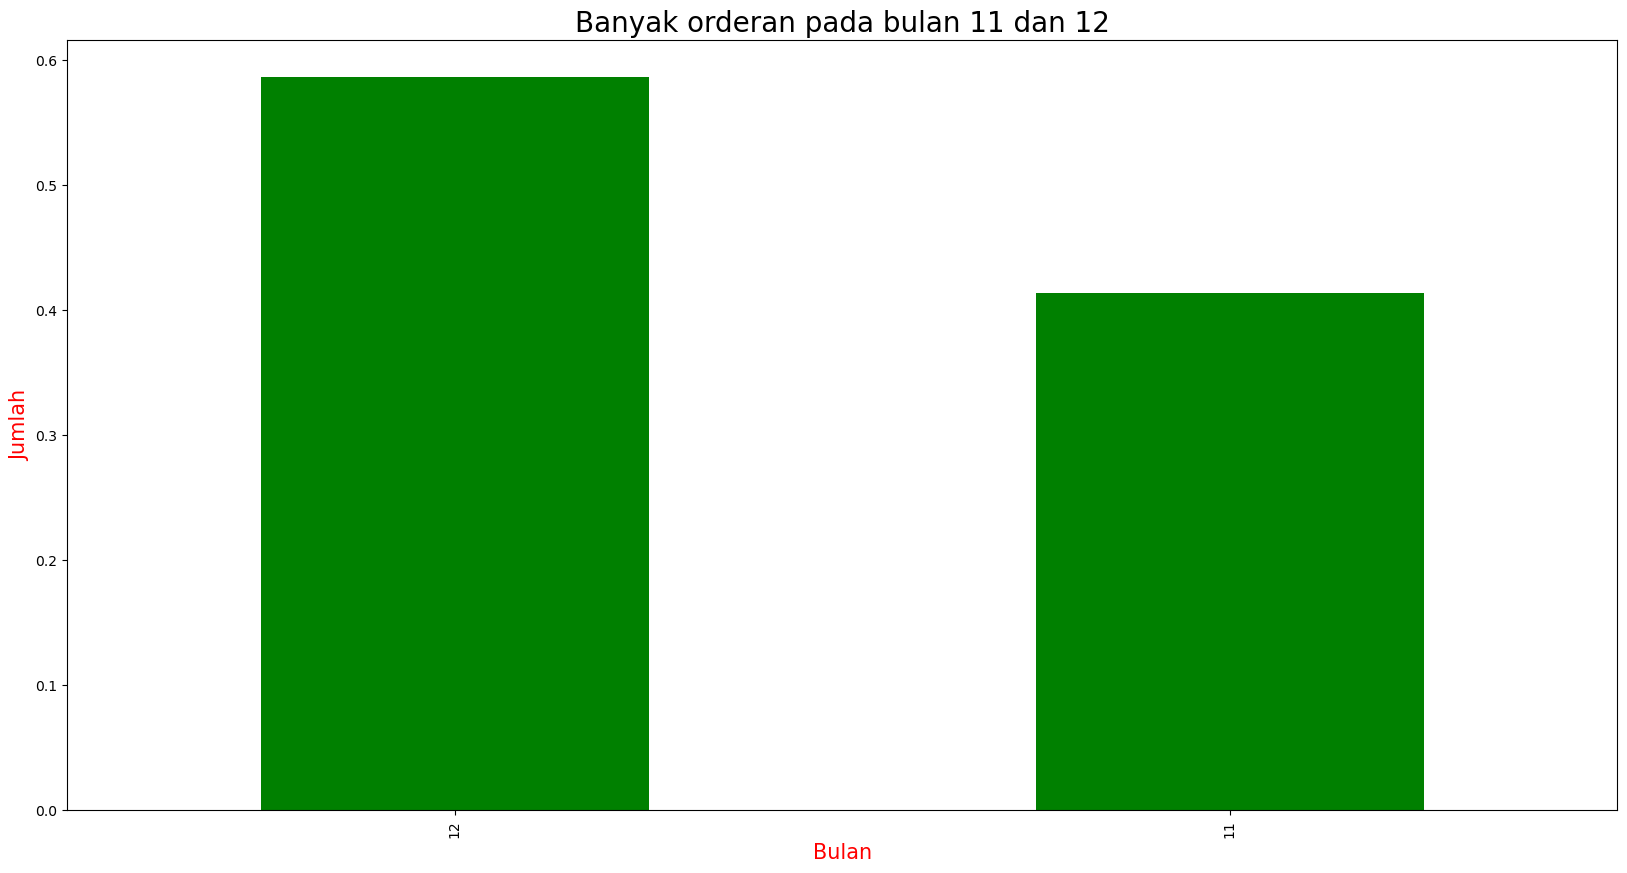

In [156]:
# inisiasi bentuk bar
month_type.plot(kind = 'bar', 
                    figsize=(20,10), 
                    color='green',
                    legend = False)

# nama judul bar chart
plt.title('Banyak orderan pada bulan 11 dan 12', fontsize = 20)
# nama xlabel
plt.xlabel('Bulan', fontsize = 15, color = "red")
# nama ylabel
plt.ylabel('Jumlah', fontsize = 15, color = "red")

# print bar chart
plt.show()

##### Keterangan 
    - Pada kolom month hanya terdapat bulan 11 dan 12 saja.
    - Pada kolom month didapatkan bahwa bulan 12 lebih tinggi jumlah orderan dibandingkan pada bulan 11 
    - Secara presentase jumlah pada bulan 12 sebanyak 59%, 
    - dan pada bulan ke 11 sebanyak 41%

### Rata rata harga pada bulan 11 dan 12

In [157]:
data_month = data_cleaning.groupby(['month'])['price'].mean()

data_month

month
11    16.535784
12    16.551707
Name: price, dtype: float64

## Kesimpulan Kolom 'month' 
Pada kolom month dapat disimpulkan sebagai berikut:
   - Kolom month hanya terdiri dari 2 jenis bulan yaitu bulan 11 dan 12
   - Pada kolom month bulan 12 lebih tinggi jumlah orderannya dibandingkan pada bulan 11
   - Pada bulan 12 sebanyak sekitar 59%
   - Pada bulan 11 sebanyak sekitar 41%
   - Rata rata harga pada bulan 11 & 12 tidak jauh berbeda, pada bulan 11 memiliki rata rata 16.5357 dan pada bulan 12 sebesar 16.5517
   - Perbedaan rata rata pada kedua bulan tersebut tidak jauh berbeda.
   - Simpulan yang didapatkan yaitu bulan desember lebih banyak orderan dibandingkan bulan november

## Analisa 'day'

In [158]:
data_cleaning['day'].unique()

array([16, 27, 28, 30, 29, 17, 26,  2,  3, 13, 14,  1, 18, 15,  4, 10,  9],
      dtype=int64)

In [159]:
# Menghitung total dari setiap unique pada kolom 'day'
sum_day = data_cleaning.groupby('day').size()
sum_day

day
1     45240
2     44928
3     44928
4     12636
9      1674
10     2773
13    38531
14    44928
15    44928
16    44928
17    44928
18    36192
26    31587
27    76121
28    73691
29    59974
30    45084
dtype: int64

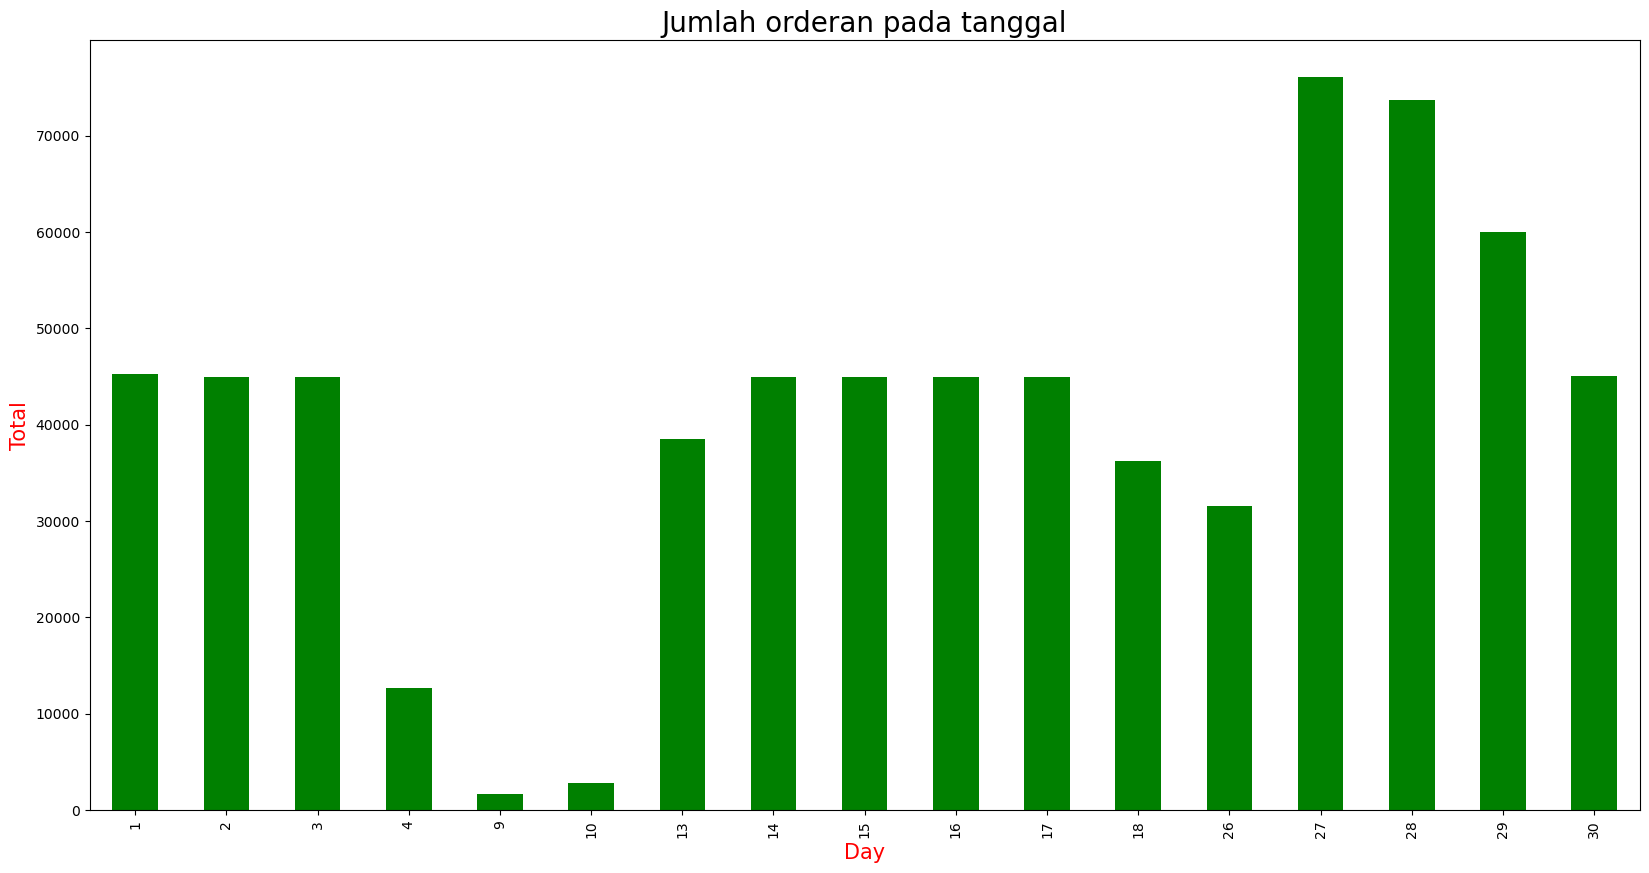

In [160]:
# inisiasi bentuk bar
sum_day.plot(kind = 'bar', 
                    figsize=(20,10), 
                    color='green',
                    legend = False)

# nama judul bar chart
plt.title('Jumlah orderan pada tanggal', fontsize = 20)
# nama xlabel
plt.xlabel('Day', fontsize = 15, color = "red")
# nama ylabel
plt.ylabel('Total', fontsize = 15, color = "red")

# print bar chart
plt.show()

##### Keterangan 
    - Pada day terdiri dari day 1, 2, 3, 4, 9, 10, 13, 14, 15, 16, 17, 18, 26, 27, 28, 29, 30
    - Pada kolom day yang memiliki jumlah orderan tertinggi pada day 27 yaitu sebanyak 76121
    - Pada kolom day yang memiliki jumlah orderan paling sedikit pada day 9 dengan jumlah 1674
    - Terdapat day yang tidak memiliki orderan yaitu pada hari ke 5, 6, 7, 8, 11, 12, 19, 20, 21, 22, 23, 24, 25, 31.
    - Kenaikan yang signifikan terdiri pada tanggal 10 ke 13 dan 26 ke 27
    - Penurunan yang signifikan terdiri pada tanggal 3 ke 4 
    - Pada tanggal 27-30 terjadi penurunan berturut turut

### Rata rata harga pada setiap day

In [161]:
data_day = data_cleaning.groupby(['day'])['price'].mean()

data_day

day
1     16.570295
2     16.548406
3     16.471247
4     16.644866
9     16.774219
10    16.431044
13    16.586135
14    16.558696
15    16.559401
16    16.583401
17    16.501294
18    16.567230
26    16.533858
27    16.586578
28    16.527692
29    16.563018
30    16.428369
Name: price, dtype: float64

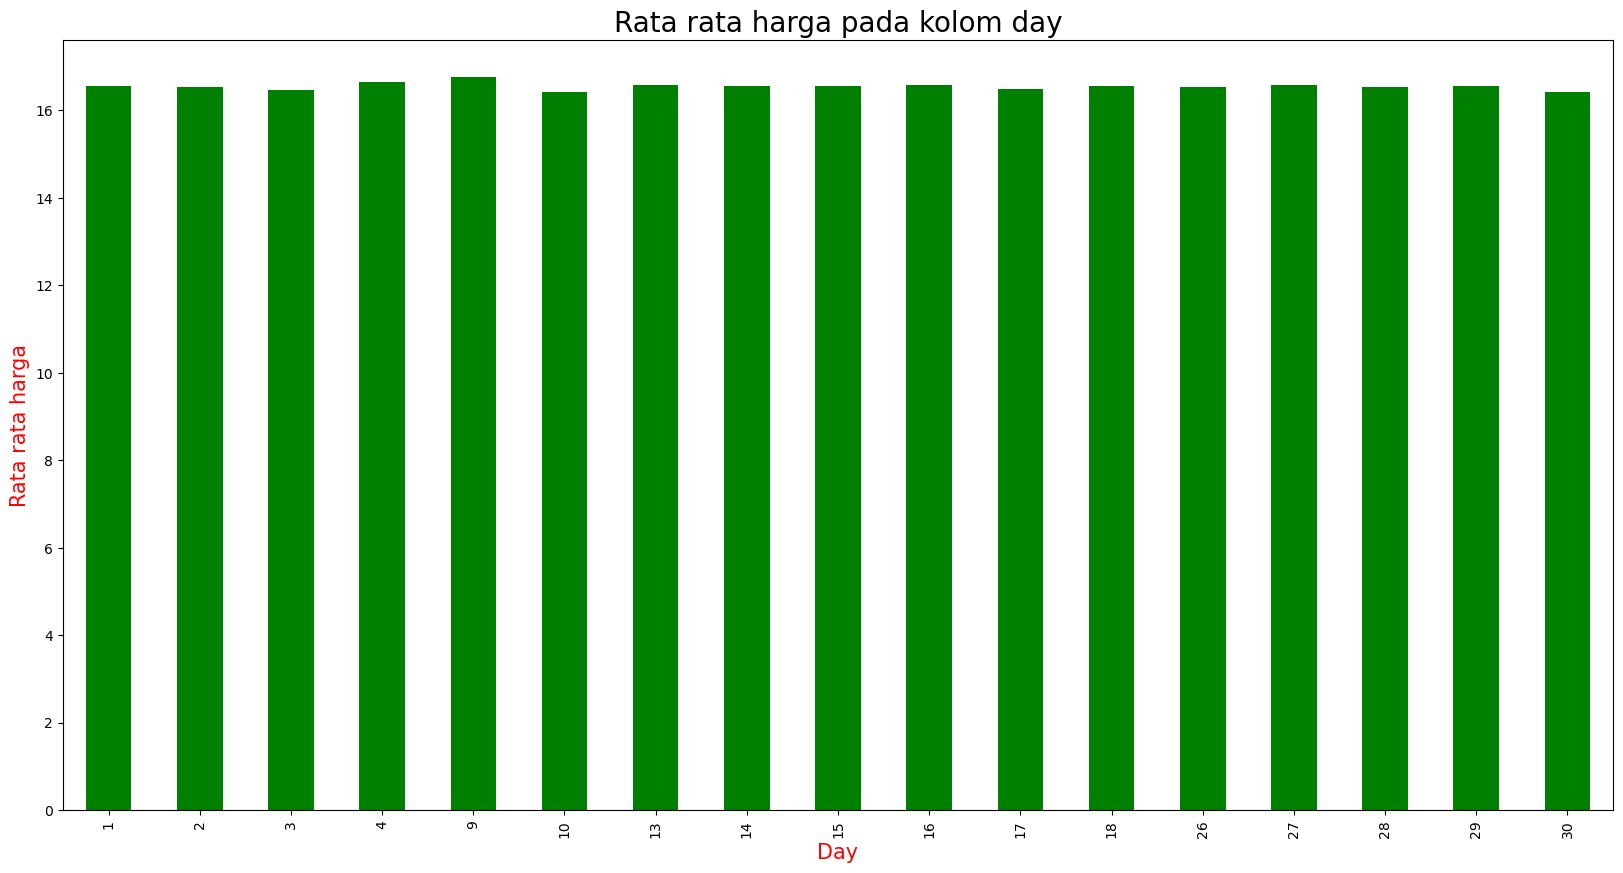

In [162]:
# inisiasi bentuk bar
data_day.plot(kind = 'bar', 
                    figsize=(20,10), 
                    color='green',
                    legend = False)

# nama judul bar chart
plt.title('Rata rata harga pada kolom day', fontsize = 20)
# nama xlabel
plt.xlabel('Day', fontsize = 15, color = "red")
# nama ylabel
plt.ylabel('Rata rata harga', fontsize = 15, color = "red")

# print bar chart
plt.show()

## Kesimpulan Kolom 'day' 
Pada kolom day dapat disimpulkan sebagai berikut:
   
   - Pada kolom day yang memiliki jumlah orderan tertinggi pada day 27 yaitu sebanyak 76121
   - Pada kolom day yang memiliki jumlah orderan paling sedikit pada day 9 dengan jumlah 1674
   - Terdapat day yang tidak memiliki orderan yaitu pada hari ke 5, 6, 7, 8, 11, 12, 19, 20, 21, 22, 23, 24, 25, 31.
   - Kenaikan yang signifikan terdiri pada tanggal 10 ke 13 dan 26 ke 27
   - Penurunan yang signifikan terdiri pada tanggal 3 ke 4 
   - Pada tanggal 27-30 terjadi penurunan berturut turut
   - Tidak setiap orang memesan setiap hari.
   - Rata rata harga pada setiap harinya sama jadi tidak mempengaruhi secara signifikan

## Analisa 'hour'

In [163]:
data_cleaning['hour'].unique()

array([ 9,  2,  1,  4,  3, 18,  5, 19,  6, 10, 16, 22, 23,  0, 14, 11,  7,
       20, 13,  8, 12, 21, 17, 15], dtype=int64)

In [164]:
# Menghitung total dari setiap unique pada kolom 'hour'
sum_hour = data_cleaning.groupby('hour').size()
sum_hour

hour
0     32413
1     28548
2     28548
3     27815
4     28330
5     25008
6     27336
7     24936
8     24275
9     28971
10    30384
11    30384
12    30384
13    30384
14    30384
15    30383
16    30384
17    30384
18    30384
19    27555
20    26782
21    27732
22    29436
23    31931
dtype: int64

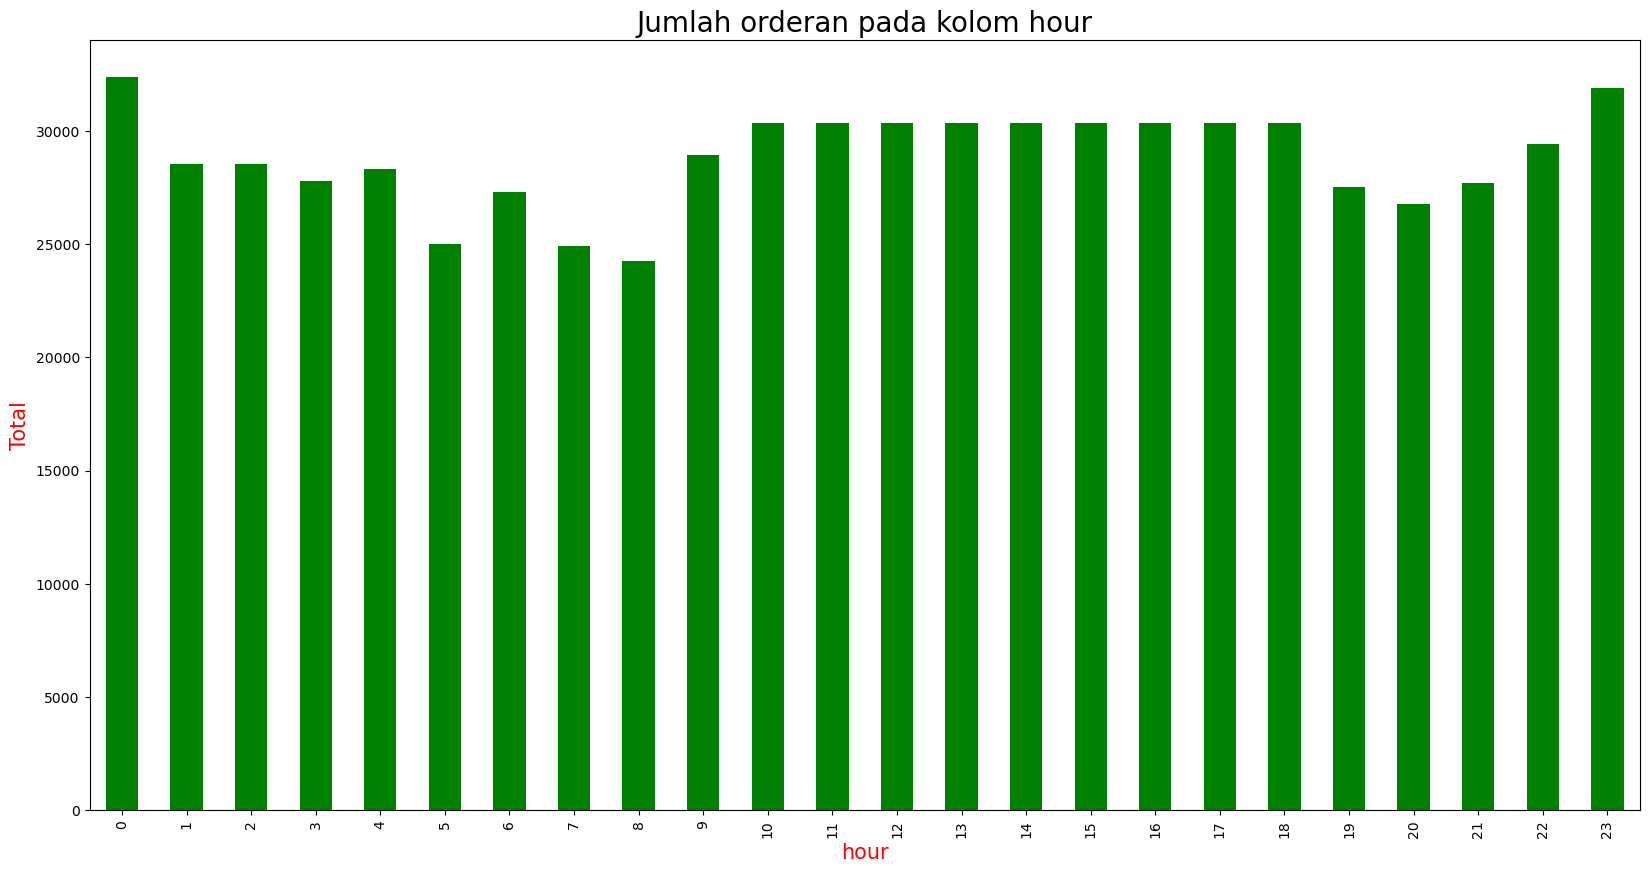

In [165]:
# inisiasi bentuk bar
sum_hour.plot(kind = 'bar', 
                    figsize=(20,10), 
                    color='green',
                    legend = False)

# nama judul bar chart
plt.title('Jumlah orderan pada kolom hour', fontsize = 20)
# nama xlabel
plt.xlabel('hour', fontsize = 15, color = "red")
# nama ylabel
plt.ylabel('Total', fontsize = 15, color = "red")

# print bar chart
plt.show()

##### Keterangan hour
    - Pada kolom terdiri hour dimulai dari hour 0-24
    - Pada kolom hour yang memiliki jumlah orderan tertinggi pada hour ke 0
    - Pada kolom hour yang memiliki jumlah orderan paling sedikit pada hour 8
    - Orderan pada hour ke 10-18 relatif stabil 
    - Pada hour ke 20-23 terjadi kenaikan trend orderan pada hour tersebut 
    - Pada hour 0-8 trend orderan relatif menurun

### Rata rata harga pada setiap hour

In [166]:
data_hour = data_cleaning.groupby(['hour'])['price'].mean()

data_hour

hour
0     16.572445
1     16.516235
2     16.560504
3     16.540162
4     16.576650
5     16.537853
6     16.521392
7     16.495930
8     16.598680
9     16.515160
10    16.504600
11    16.557432
12    16.490170
13    16.549379
14    16.549505
15    16.526495
16    16.516462
17    16.603219
18    16.519105
19    16.551868
20    16.594842
21    16.599663
22    16.591359
23    16.504643
Name: price, dtype: float64

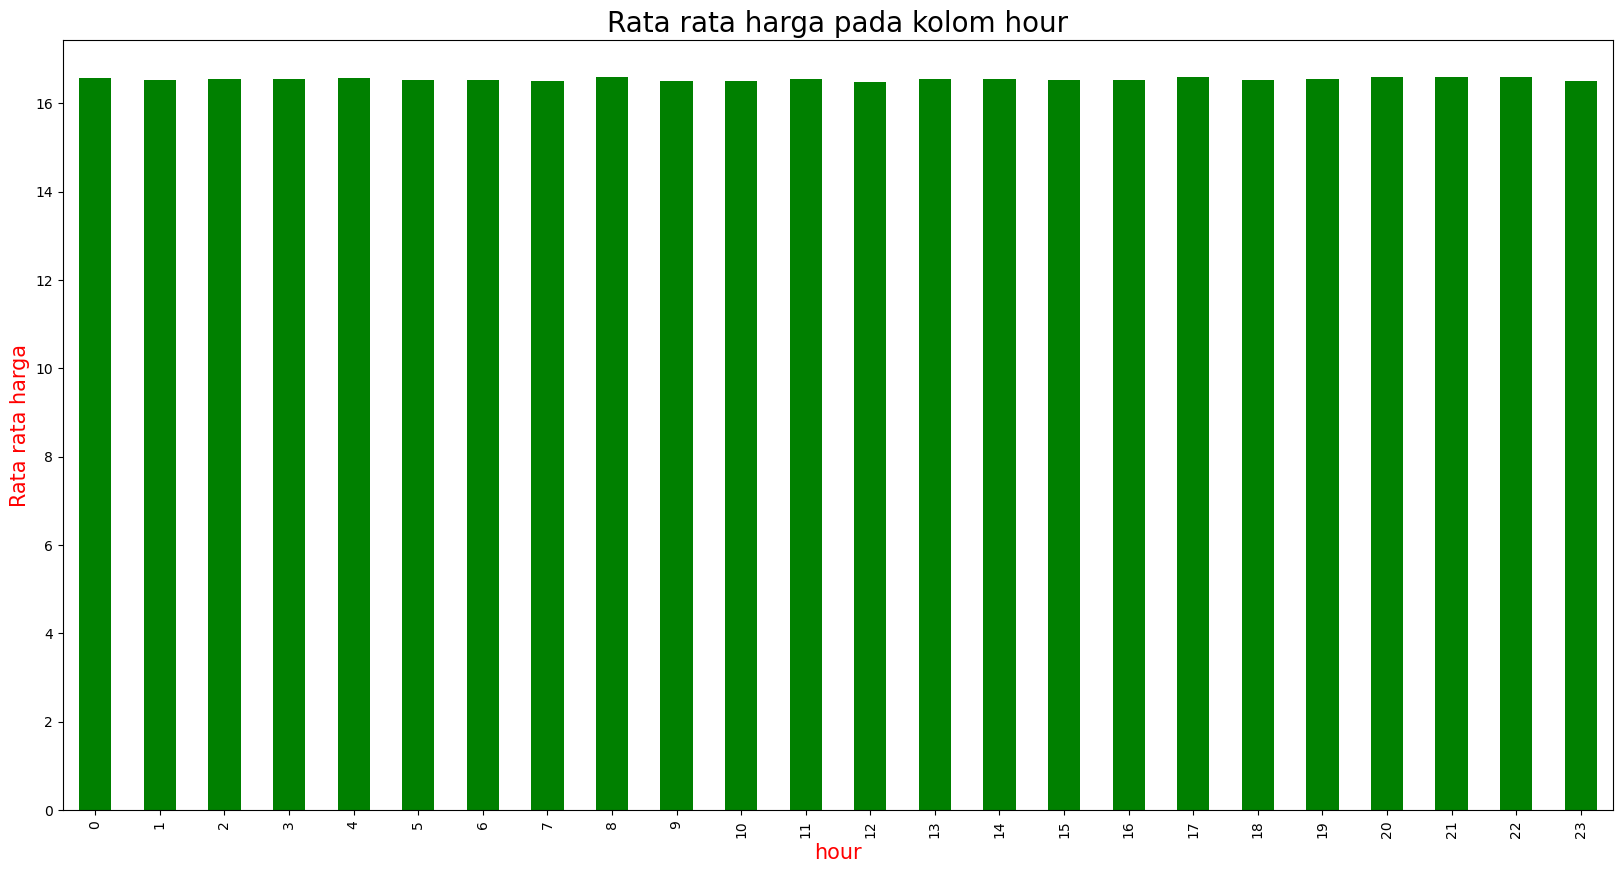

In [167]:
# inisiasi bentuk bar
data_hour.plot(kind = 'bar', 
                    figsize=(20,10), 
                    color='green',
                    legend = False)

# nama judul bar chart
plt.title('Rata rata harga pada kolom hour', fontsize = 20)
# nama xlabel
plt.xlabel('hour', fontsize = 15, color = "red")
# nama ylabel
plt.ylabel('Rata rata harga', fontsize = 15, color = "red")

# print bar chart
plt.show()

## Kesimpulan Kolom 'hour' 
Pada kolom hour dapat disimpulkan sebagai berikut:
   - Kolom terdiri dari 0-23
   - Pada kolom hour, pada hour 0 memiliki jumlah orderan yang tinggi
   - Pada kolom hour yang memiliki jumlah orderan paling sedikit pada hour 8
   - Orderan pada hour ke 10-18 relatif stabil 
   - Pada hour ke 20-23 terjadi kenaikan trend orderan pada hour tersebut 
   - Pada hour 0-8 trend orderan relatif menurun
   - Rata rata hour cenderung sama pada setiap hournya. Akan tetapi jam mempengaruhi jumlah orderan yang ada

## Kesimpulan analisa berdasarkan waktu (day, month, hour)
Pada analisa berdasarkan waktu antara day, month dan hour dapat disimpulkan bahwa rata rata harga pada setiap waktu relatif stabil sehingga tidak ada terjadinya overprice pada day, month atau hour tertentu. Orderan pada malam hari dan akhir bulan cenderung melonjak sedangkan pada akhir bulan dan jam kerja relatif stabil. Dari ketiga variabel tersebut cocok dijadikan sebagai feature pengaruh price karena data tersebut relatif stabil

# Analisa harga berdasarkan cuaca
Analisa harga berdasarkan cuaca merupakan analisa untuk menjawab apakah cuaca berpengaruh signifikan terhadap harga yang disajikan. Pada data tersebut sangat banyak kolom yang mengandung unsur cuara, jadi kita ambil saja semua yang berkaitan dengan cuaca. Cuaca tersebut meliputi kolom 'short_summary', 'temperature', 'icon', 'temperatureMin', 'temperatureMax', 'temperatureMaxTime', tempereatureMinTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'windSpeed'

In [168]:
data_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   timestamp                    693071 non-null  float64       
 1   hour                         693071 non-null  int64         
 2   day                          693071 non-null  int64         
 3   month                        693071 non-null  int64         
 4   datetime                     693071 non-null  datetime64[ns]
 5   source                       693071 non-null  object        
 6   destination                  693071 non-null  object        
 7   cab_type                     693071 non-null  object        
 8   product_id                   693071 non-null  object        
 9   name                         693071 non-null  object        
 10  price                        693071 non-null  float64       
 11  distance                  

In [169]:
# Slicing data yang mengandung unsur cuaca
data_cuaca = data_cleaning.loc[:, [ 'temperatureMax', 'temperatureMin','temperatureMinTime','temperatureMaxTime','temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'visibility', 'windSpeed', 'icon', 'short_summary', 'temperature', 'distance','price' ]]
data_cuaca.head()

,temperatureMax,temperatureMin,temperatureMinTime,temperatureMaxTime,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,visibility,windSpeed,icon,short_summary,temperature,distance,price
0,43.68,39.89,1545012000,1544968800,1544968800,33.73,1545012000,38.07,1544958000,10.000,8.66,partly-cloudy-night,Mostly Cloudy,42.34,0.44,5.0
1,47.30,40.49,1543233600,1543251600,1543251600,36.20,1543291200,43.92,1543251600,4.786,11.98,rain,Rain,43.58,0.44,11.0
2,47.55,35.36,1543377600,1543320000,1543320000,31.04,1543377600,44.12,1543320000,10.000,7.33,clear-night,Clear,38.33,0.44,7.0
3,45.03,34.67,1543550400,1543510800,1543510800,30.30,1543550400,38.53,1543510800,10.000,5.28,clear-night,Clear,34.38,0.44,26.0
4,42.18,33.10,1543402800,1543420800,1543420800,29.11,1543392000,35.75,1543420800,10.000,9.14,partly-cloudy-night,Partly Cloudy,37.44,0.44,9.0


In [170]:
#memberikan label encoder
label_encode = preprocessing.LabelEncoder()

#menyalin data pada variabel cuaca_encode
cuaca_encode = data_cuaca.copy()

for col in cuaca_encode.select_dtypes(include='O').columns:
    cuaca_encode[col]=label_encode.fit_transform(data_cuaca[col])
    

In [171]:
cuaca_encode.head()

,temperatureMax,temperatureMin,temperatureMinTime,temperatureMaxTime,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,visibility,windSpeed,icon,short_summary,temperature,distance,price
0,43.68,39.89,1545012000,1544968800,1544968800,33.73,1545012000,38.07,1544958000,10.000,8.66,5,4,42.34,0.44,5.0
1,47.30,40.49,1543233600,1543251600,1543251600,36.20,1543291200,43.92,1543251600,4.786,11.98,6,8,43.58,0.44,11.0
2,47.55,35.36,1543377600,1543320000,1543320000,31.04,1543377600,44.12,1543320000,10.000,7.33,1,0,38.33,0.44,7.0
3,45.03,34.67,1543550400,1543510800,1543510800,30.30,1543550400,38.53,1543510800,10.000,5.28,1,0,34.38,0.44,26.0
4,42.18,33.10,1543402800,1543420800,1543420800,29.11,1543392000,35.75,1543420800,10.000,9.14,5,6,37.44,0.44,9.0


In [172]:
data_cuaca.head()

,temperatureMax,temperatureMin,temperatureMinTime,temperatureMaxTime,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,visibility,windSpeed,icon,short_summary,temperature,distance,price
0,43.68,39.89,1545012000,1544968800,1544968800,33.73,1545012000,38.07,1544958000,10.000,8.66,partly-cloudy-night,Mostly Cloudy,42.34,0.44,5.0
1,47.30,40.49,1543233600,1543251600,1543251600,36.20,1543291200,43.92,1543251600,4.786,11.98,rain,Rain,43.58,0.44,11.0
2,47.55,35.36,1543377600,1543320000,1543320000,31.04,1543377600,44.12,1543320000,10.000,7.33,clear-night,Clear,38.33,0.44,7.0
3,45.03,34.67,1543550400,1543510800,1543510800,30.30,1543550400,38.53,1543510800,10.000,5.28,clear-night,Clear,34.38,0.44,26.0
4,42.18,33.10,1543402800,1543420800,1543420800,29.11,1543392000,35.75,1543420800,10.000,9.14,partly-cloudy-night,Partly Cloudy,37.44,0.44,9.0


# HEAT MAP


In [173]:
# Fungsi heatmap
def heat_map(nama_df,list_kolom): #nama df itu nama datasetnya, list kolom adalah list korelasi yang ingin di cek
    df_sementara = nama_df[list_kolom] #memasukkan data kolom tersebut kedalam variabel baru
    plt.figure(figsize=(20,23)) #menyetting ukuran
    sns.heatmap(df_sementara.corr(),annot=True,cmap="Reds", annot_kws={'fontsize': 15}) #melakukan heat map dengan menampilkan nilai dari

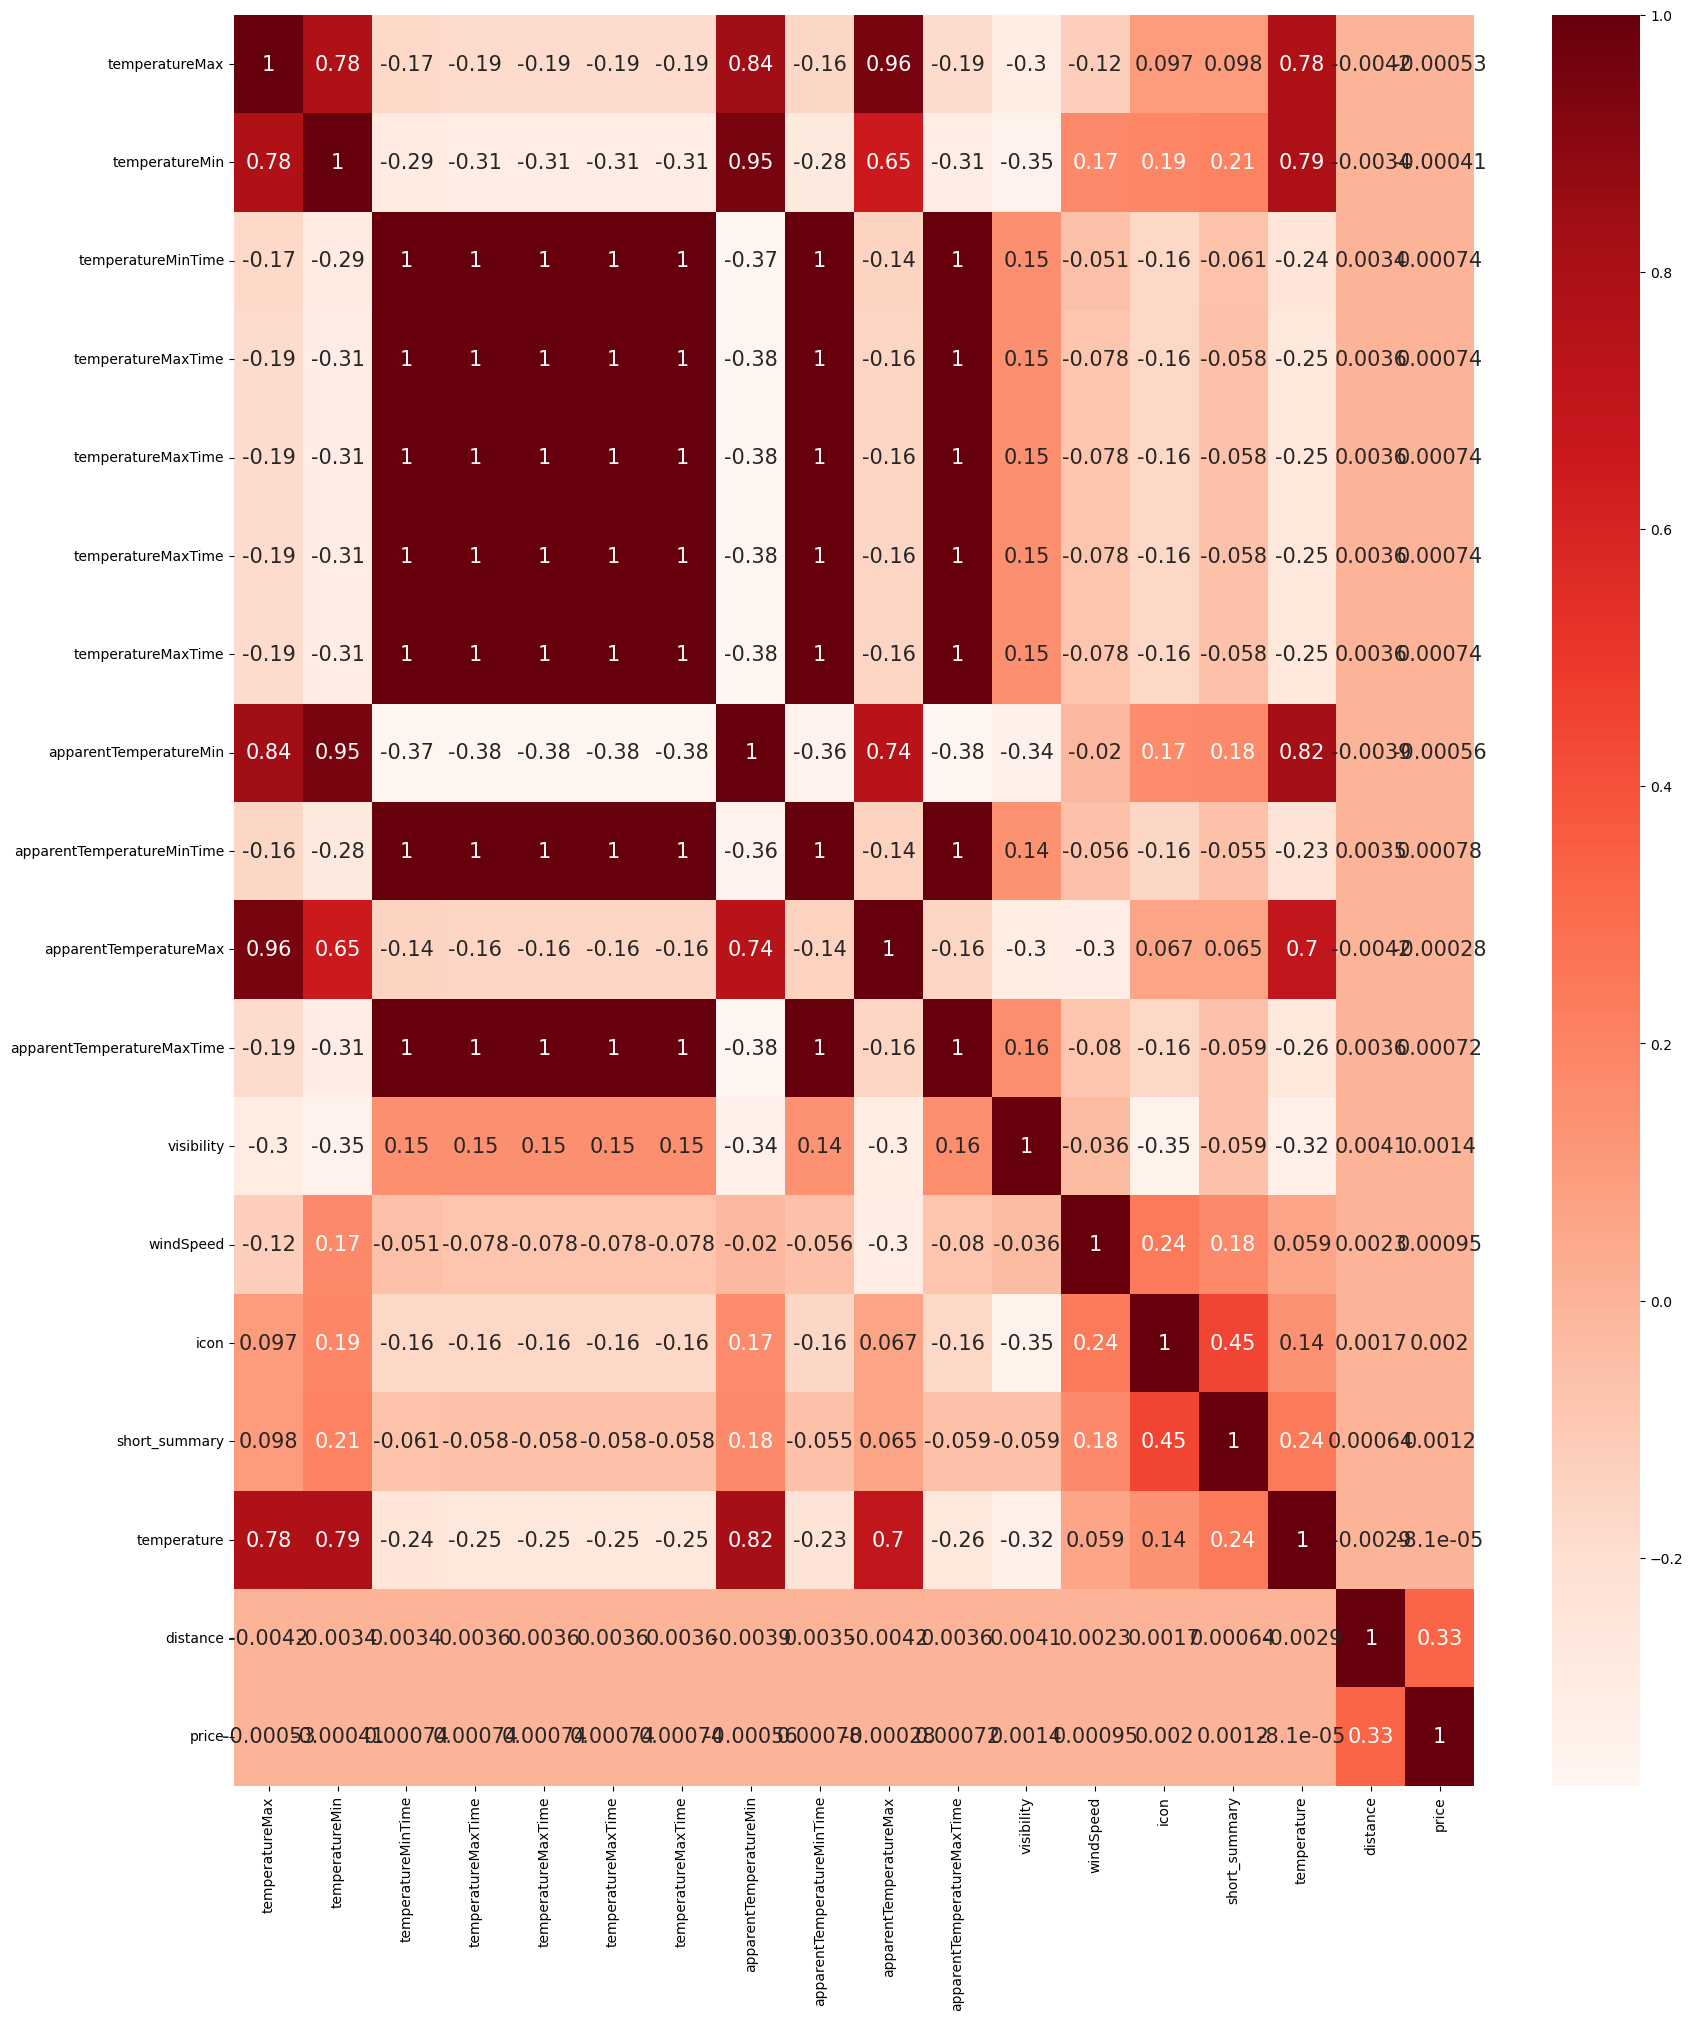

In [174]:
dfnew = ['temperatureMax', 'temperatureMin','temperatureMinTime','temperatureMaxTime','temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'visibility', 'windSpeed', 'icon', 'short_summary', 'temperature', 'distance','price' ]
heat_map(cuaca_encode,dfnew)

In [175]:
# To find the correlation among
# the columns using pearson method
cuaca_encode.corr(method ='pearson')


,temperatureMax,temperatureMin,temperatureMinTime,temperatureMaxTime,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,visibility,windSpeed,icon,short_summary,temperature,distance,price
temperatureMax,1.000000,0.782945,-0.168071,-0.185512,-0.185512,0.838358,-0.162140,0.956358,-0.186660,-0.297159,-0.120832,0.096632,0.098440,0.780546,-0.004191,-0.000527
temperatureMin,0.782945,1.000000,-0.294607,-0.306577,-0.306577,0.953854,-0.278444,0.648381,-0.308665,-0.352869,0.173915,0.191049,0.208596,0.789261,-0.003396,-0.000411
temperatureMinTime,-0.168071,-0.294607,1.000000,0.998165,0.998165,-0.372710,0.999376,-0.143231,0.998136,0.152441,-0.051350,-0.162437,-0.061117,-0.242698,0.003428,0.000738
temperatureMaxTime,-0.185512,-0.306577,0.998165,1.000000,1.000000,-0.375731,0.998467,-0.155643,0.999959,0.154674,-0.078361,-0.162200,-0.057815,-0.253881,0.003580,0.000735
temperatureMaxTime,-0.185512,-0.306577,0.998165,1.000000,1.000000,-0.375731,0.998467,-0.155643,0.999959,0.154674,-0.078361,-0.162200,-0.057815,-0.253881,0.003580,0.000735
apparentTemperatureMin,0.838358,0.953854,-0.372710,-0.375731,-0.375731,1.000000,-0.355199,0.741950,-0.377402,-0.344016,-0.020056,0.167114,0.175481,0.817521,-0.003937,-0.000556
apparentTemperatureMinTime,-0.162140,-0.278444,0.999376,0.998467,0.998467,-0.355199,1.000000,-0.137621,0.998345,0.142179,-0.056391,-0.158868,-0.054880,-0.231513,0.003526,0.000781
apparentTemperatureMax,0.956358,0.648381,-0.143231,-0.155643,-0.155643,0.741950,-0.137621,1.000000,-0.156426,-0.297751,-0.304547,0.067454,0.065379,0.703208,-0.004238,-0.000278
apparentTemperatureMaxTime,-0.186660,-0.308665,0.998136,0.999959,0.999959,-0.377402,0.998345,-0.156426,1.000000,0.155300,-0.079521,-0.163354,-0.058945,-0.255288,0.003584,0.000716
visibility,-0.297159,-0.352869,0.152441,0.154674,0.154674,-0.344016,0.142179,-0.297751,0.155300,1.000000,-0.035520,-0.348845,-0.059318,-0.324087,0.004092,0.001435


Setelah membuat tabel korelasi kolom yang mengandung unsur cuaca dan dilakukan perhitungan korelasi terhadap tabel price, diambil beberapa yang memiliki nilai korelasi yang tinggi. Diambil kolom icon dan short_summary

## Analisa pada kolom icon terhadap price

In [176]:
data_cleaning['icon'].unique()

array([' partly-cloudy-night ', ' rain ', ' clear-night ', ' cloudy ',
       ' fog ', ' clear-day ', ' partly-cloudy-day '], dtype=object)

In [177]:
# Menghitung total dari setiap unique pada kolom 'hour'
sum_icon = data_cleaning.groupby('icon').size()
sum_icon

icon
 clear-day                26832
 clear-night              60294
 cloudy                  218895
 fog                       9060
 partly-cloudy-day       115404
 partly-cloudy-night     158030
 rain                    104556
dtype: int64

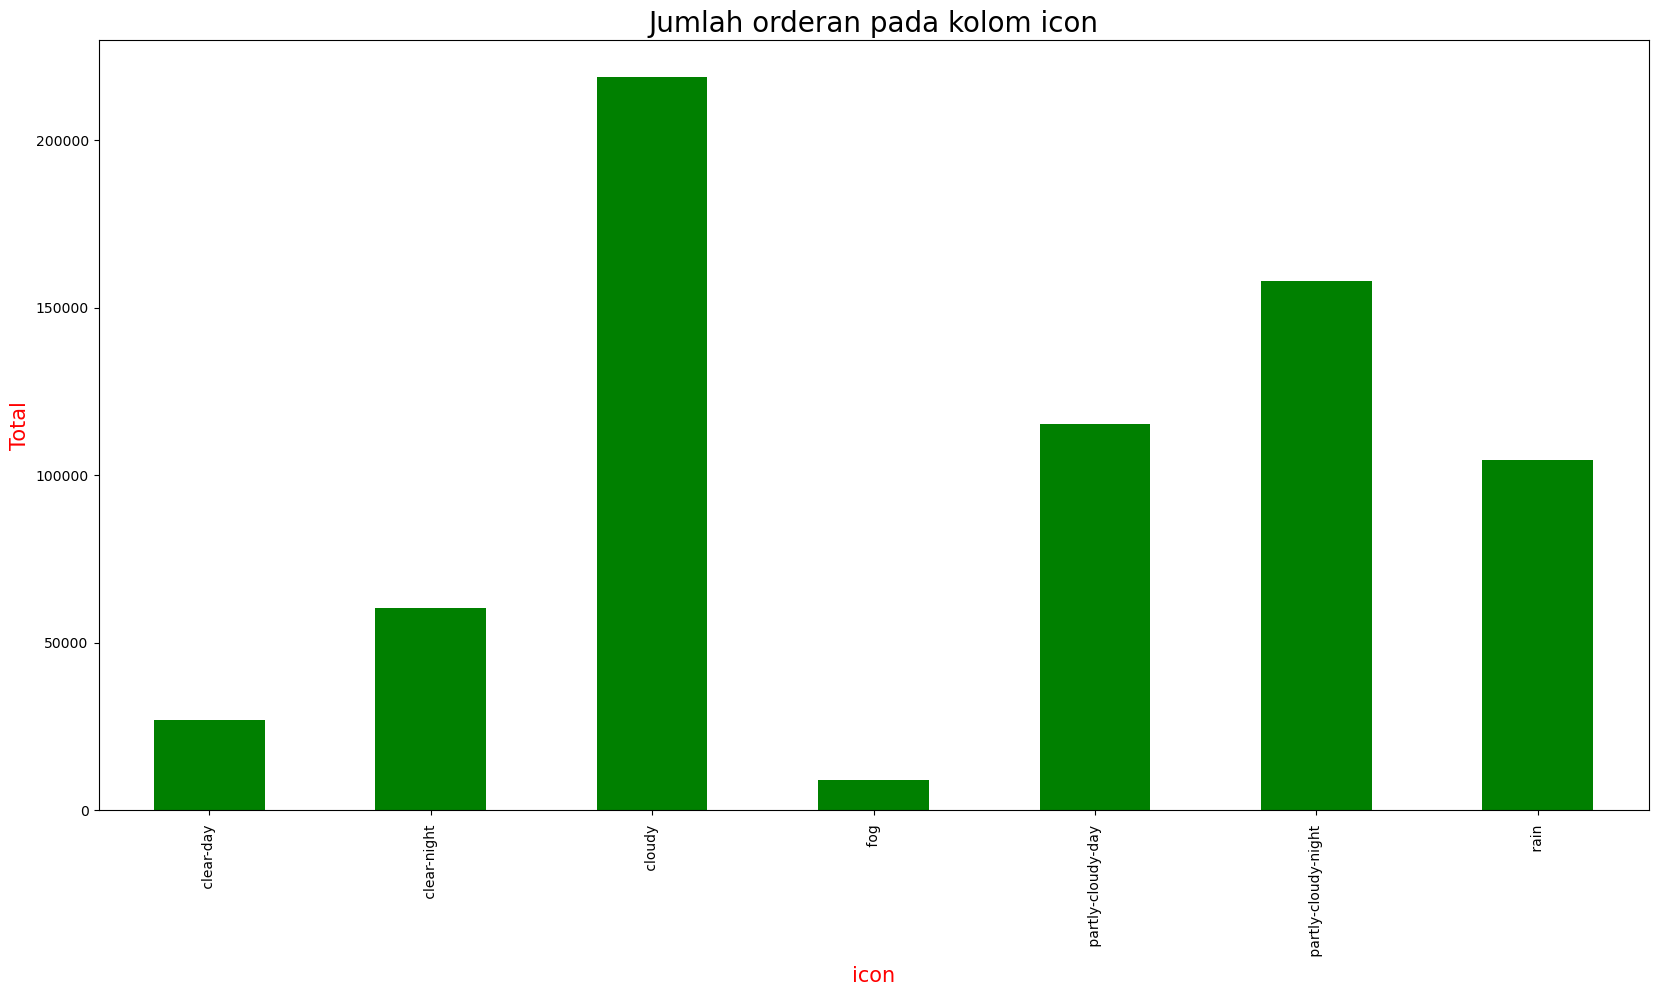

In [178]:
# inisiasi bentuk bar
sum_icon.plot(kind = 'bar', 
                    figsize=(20,10), 
                    color='green',
                    legend = False)

# nama judul bar chart
plt.title('Jumlah orderan pada kolom icon', fontsize = 20)
# nama xlabel
plt.xlabel('icon', fontsize = 15, color = "red")
# nama ylabel
plt.ylabel('Total', fontsize = 15, color = "red")

# print bar chart
plt.show()

In [179]:
data_icon = data_cleaning.groupby(['icon'])['price'].mean()

data_icon

icon
 clear-day               16.516572
 clear-night             16.479744
 cloudy                  16.535915
 fog                     16.541242
 partly-cloudy-day       16.567578
 partly-cloudy-night     16.575822
 rain                    16.538599
Name: price, dtype: float64

 ## Kesimpulan kolom icon
    - Pada kolom terdiri dari 7 jenis
    - Pada kolom icon cloudy memiliki jumlah orderan yang paling tinggi
    - Pada kolom icon fog memiliki jumlah orderan yang paling rendah
    - Rata rata harga berdasarkan icon relatif sama

## Analisa pada kolom short summary terhadap price

In [180]:
data_cleaning['short_summary'].unique()

array([' Mostly Cloudy ', ' Rain ', ' Clear ', ' Partly Cloudy ',
       ' Overcast ', ' Light Rain ', ' Foggy ', ' Possible Drizzle ',
       ' Drizzle '], dtype=object)

In [181]:
# Menghitung total dari setiap unique pada kolom 'hour'
sum_short_summary = data_cleaning.groupby('short_summary').size()
sum_short_summary

short_summary
 Clear                 87126
 Drizzle                7296
 Foggy                  9060
 Light Rain            54912
 Mostly Cloudy        146210
 Overcast             218895
 Partly Cloudy        127224
 Possible Drizzle      18636
 Rain                  23712
dtype: int64

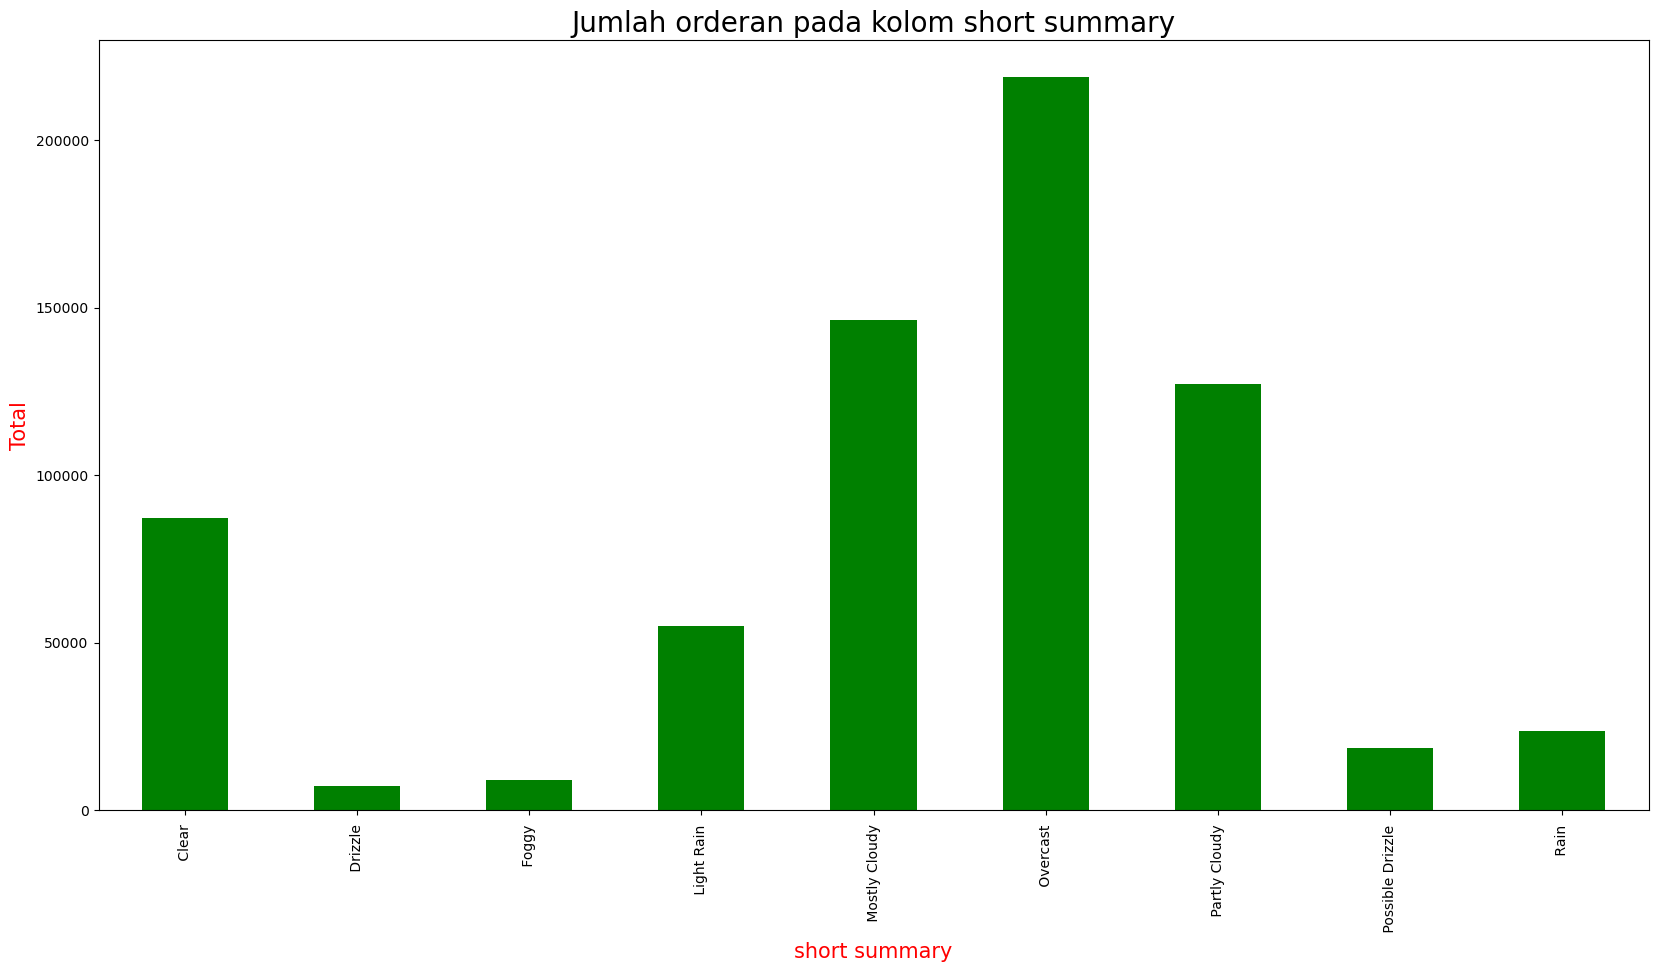

In [182]:
# inisiasi bentuk bar
sum_short_summary.plot(kind = 'bar', 
                    figsize=(20,10), 
                    color='green',
                    legend = False)

# nama judul bar chart
plt.title('Jumlah orderan pada kolom short summary', fontsize = 20)
# nama xlabel
plt.xlabel('short summary', fontsize = 15, color = "red")
# nama ylabel
plt.ylabel('Total', fontsize = 15, color = "red")

# print bar chart
plt.show()

In [183]:
data_short_summary = data_cleaning.groupby(['short_summary'])['price'].mean()

data_short_summary

short_summary
 Clear                16.491086
 Drizzle              16.505176
 Foggy                16.541242
 Light Rain           16.559980
 Mostly Cloudy        16.590506
 Overcast             16.535915
 Partly Cloudy        16.551468
 Possible Drizzle     16.486383
 Rain                 16.540405
Name: price, dtype: float64

 ### Kesimpulan kolom short_summary
    - Pada kolom terdiri dari 9 jenis
    - Pada saat overcast memiliki jumlah orderan yang paling tinggi
    - Pada kolom drizzle memiliki jumlah orderan yang paling rendah
    - Rata rata harga berdasarkan short_summary relatif sama

## Kesimpulan Pengaruh Cuaca terhadap Price
Dari analisa beberapa kolom yang mempengaruhi cuaca maka disimpulkan bahwa yang memiliki korelasi tertinggi pada kolom short_summary dan icon. Cuaca tidak mempengaruhi harga secara signifikan akan tetapi mempengaruhi jumlah orderan. Pada saat overcast dan cloudly merupakan jumlah orderan yang banyak. Jadi kita ambil salah satu saja sebagai feature untuk mewakili kolom cuaca pada featur yaitu kolom icon

# Analisa Layanan
Analisa layanan merupakan analisa beberapa kolom yang mewakili layanan layanan yang tersedia dari dataset tersebut. Analisa tersebut seperti kolom cab_type dan nama

## Analisa kolom cab_type 
   - cab_type = jenis taksi yang digunakan dalam perjalanan (Uber atau Lyft)
Pada cab_type merupakan jenis jasa taksi yang digunakan. 

In [184]:
data_cleaning['cab_type'].unique()

array(['Lyft', 'Uber'], dtype=object)

In [185]:
sum_cab_type = data_cleaning['cab_type'].value_counts(normalize=True)
sum_cab_type

Uber    0.556455
Lyft    0.443545
Name: cab_type, dtype: float64

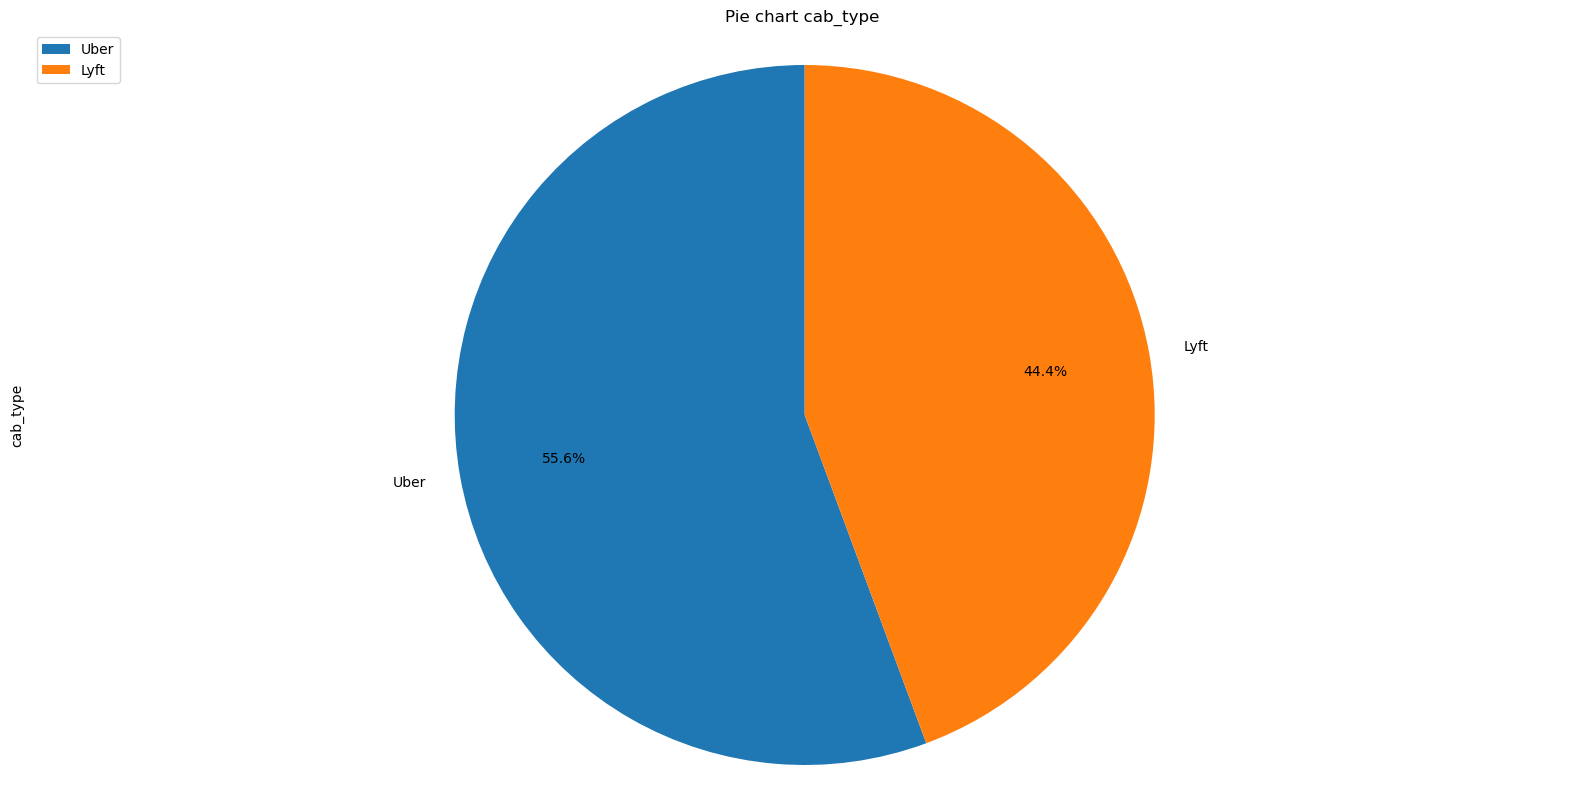

In [186]:
#inisiasi plot
explode_list = [0, 0]
sum_cab_type.plot(
    kind="pie",
    figsize=(20,10),
    autopct='%1.1f%%',
    startangle=90,
    label=None,
    pctdistance=0.7,
    rot = 45,
    subplots = True,
    explode=explode_list)

# membuat judul pie chart
plt.title('Pie chart cab_type ')

plt.axis('equal')
# membuat tabel keterangan pie chart
plt.legend(labels=sum_cab_type.index, loc='upper left')
# menampilkan pie chart
plt.show()

Keterangan cab_type
  - Hasil dari analisa cab type hanya terdiri dari 2 jenis yaitu uber dan lyft
  - Uber lebih banyak digunakan dibandingkan lyft
    

In [187]:
data_cab_type = data_cleaning.groupby(['cab_type'])['price'].mean()

data_cab_type

cab_type
Lyft    17.351396
Uber    15.902455
Name: price, dtype: float64

### Kesimpulan cab_type
    - Rata rata harga lyft lebih tinggi dibandingkan uber
    - Kemungkinan penggunaan uber lebih banyak dikarenakan harga yang lebih murah
    - cab_type mempengaruhi harga jadi pada kolom cab_type bisa dijadikan sebagai feature

## Analisa kolom name
    - name = nama mobil layanan yang digunakan
    Pada kolom name merupakan kolom yang berisikan data nama mobil dari layanan layanan pada taksi 

In [188]:
data_cleaning['name'].unique()

array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool', 'Taxi'],
      dtype=object)

In [189]:
# Menghitung total dari setiap unique pada kolom 'hour'
sum_name = data_cleaning.groupby('name').size()
sum_name

name
Black           55095
Black SUV       55096
Lux             51235
Lux Black       51235
Lux Black XL    51235
Lyft            51235
Lyft XL         51235
Shared          51233
Taxi            55095
UberPool        55091
UberX           55094
UberXL          55096
WAV             55096
dtype: int64

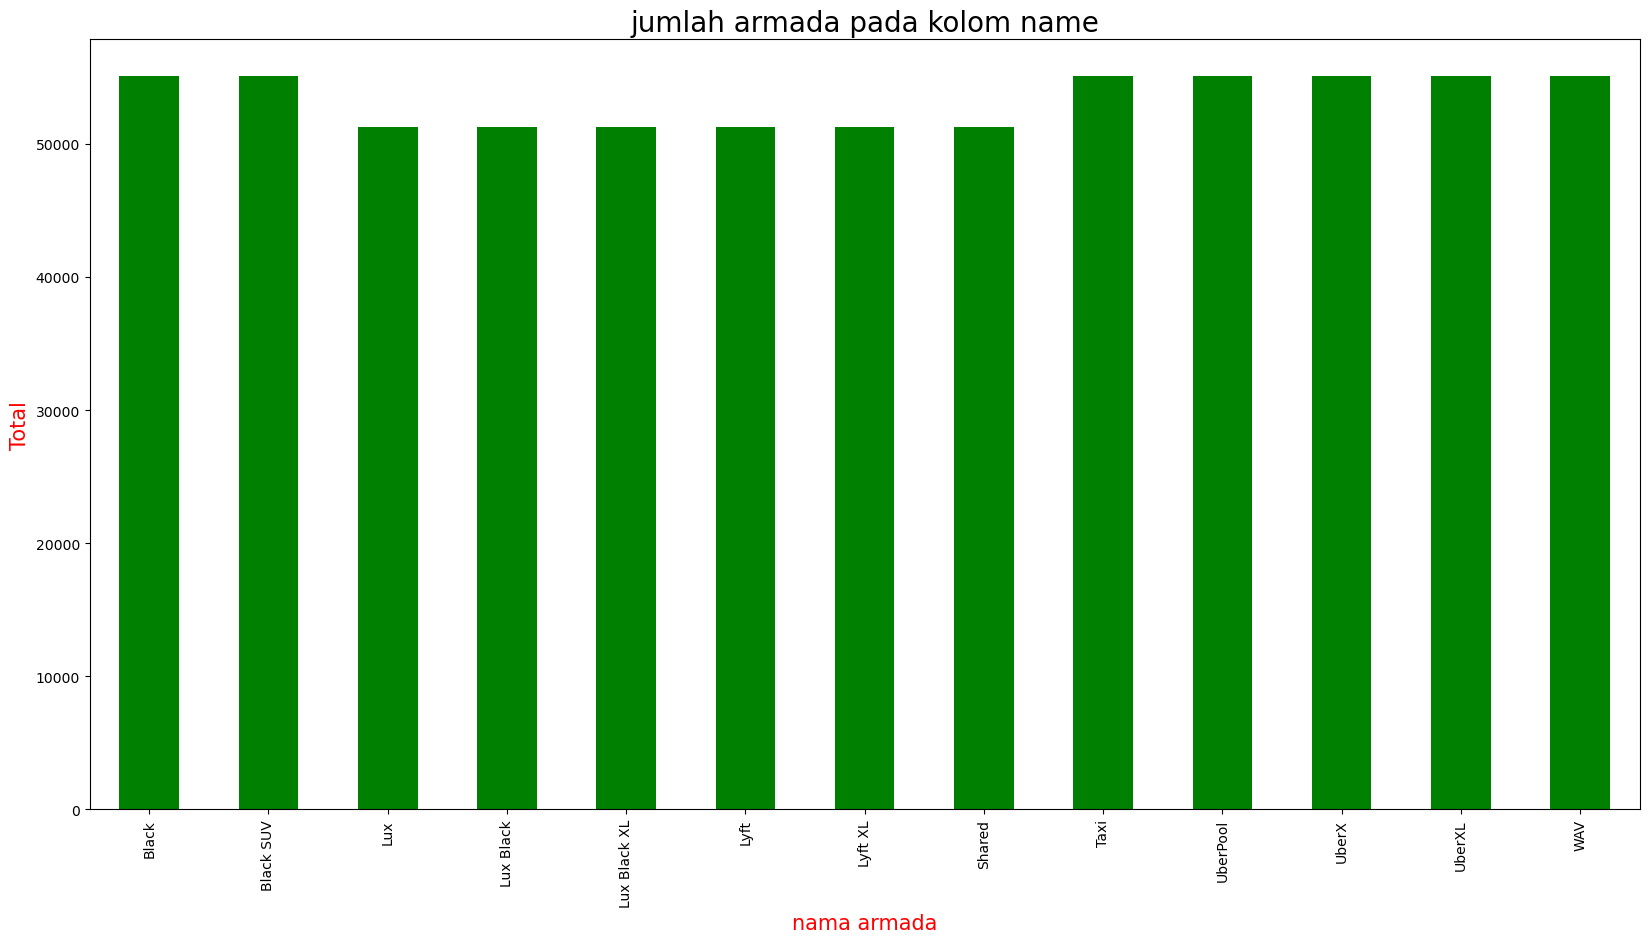

In [190]:
# inisiasi bentuk bar
sum_name.plot(kind = 'bar', 
                    figsize=(20,10), 
                    color='green',
                    legend = False)

# nama judul bar chart
plt.title('jumlah armada pada kolom name', fontsize = 20)
# nama xlabel
plt.xlabel('nama armada', fontsize = 15, color = "red")
# nama ylabel
plt.ylabel('Total', fontsize = 15, color = "red")

# print bar chart
plt.show()

In [191]:
data_name = data_cleaning.groupby(['name'])['price'].mean()

data_name

name
Black           20.523786
Black SUV       30.286763
Lux             17.771240
Lux Black       23.062468
Lux Black XL    32.324086
Lyft             9.610885
Lyft XL         15.309363
Shared           6.029893
Taxi            16.545125
UberPool         8.752500
UberX            9.765074
UberXL          15.678144
WAV              9.765019
Name: price, dtype: float64

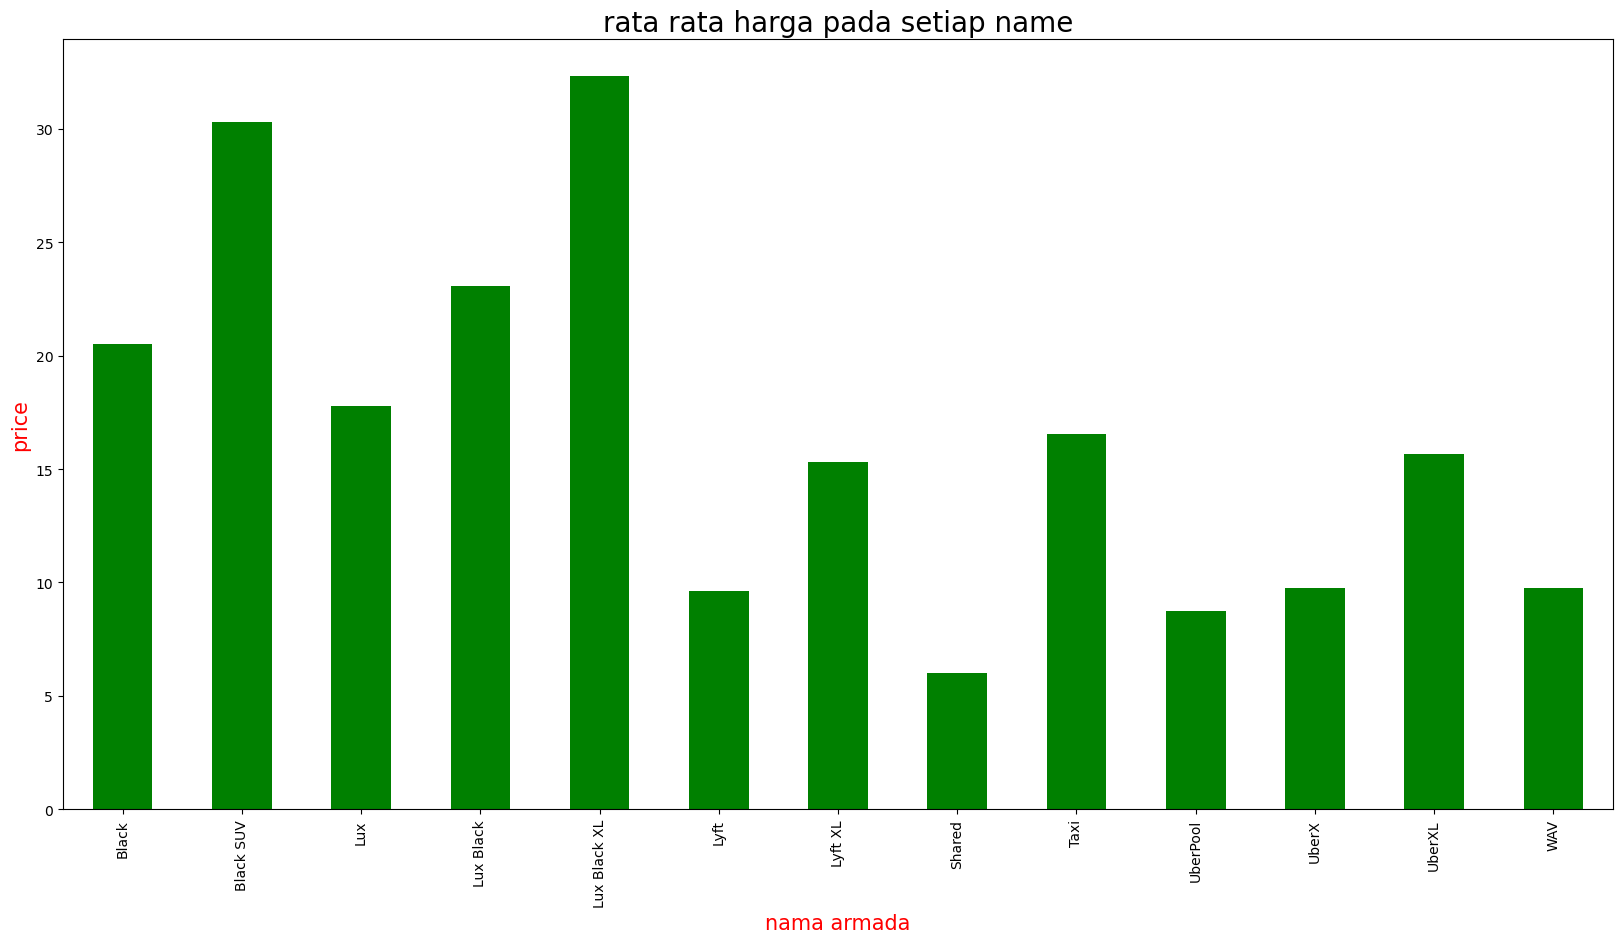

In [192]:
# inisiasi bentuk bar
data_name.plot(kind = 'bar', 
                    figsize=(20,10), 
                    color='green',
                    legend = False)

# nama judul bar chart
plt.title('rata rata harga pada setiap name', fontsize = 20)
# nama xlabel
plt.xlabel('nama armada', fontsize = 15, color = "red")
# nama ylabel
plt.ylabel('price', fontsize = 15, color = "red")

# print bar chart
plt.show()

### Kesimpulan name
 - Pada kolom name merupakan kolom jenis layanan kendaraan
 - Terdapat 13 jenis layanan kendaraan yang disediakan oleh uber maupun lyft
 - Masing masing armada terpaut diatas 5000 unit semua
 - Rata rata tertinggi harga layanan pada Lux Black XL
 - Rata rata harga terendah pada layanan Shared
 - Semakin bagus jenis layanannya maka harganya semakin mahal

## Kesimpulan Analisa Berdasarkan Layanan
Dari tabel layanan diambil 2 tabel yang berkaitan yaitu kolom cab_type dan name. Tabel cab_type merupakan jenis aplikasi yang digunakan dan name adalah jenis kendaraan yang dipesan. Pengguna uber jauh lebih banyak dari pada lyft dikarenakan rata-rata harga uber lebih murah dibandingkan rata-rata harga lyft. Layanan jenis name juga memiliki perbedaan rata rata yang signifikan jadi dipastikan bahwa cab_type dan name mempengaruhi harga juga.
Maka dari itu disimpulkan bahwa kolom cab_type dan name bisa digunakan sebagai feature pada regresi

# Analisa Titik Jemput, Jarak dan Titik Sampai dengan Kolom Price
Pada analisa titik jemput jarak dan titik sampai mengambil beberapa kolom yang mengandung dengan unsur unsur tersebut contohnya kolom 'distance', 'destination', 'sourcce', 'surge_multiplier', 'latitude', 'longitude'.
    
Karena sudah terdapat kolom 'distance' yang mewakili jarak jadi tidak perlu membuat analisa 'destination', 'source', latitude, dan longitude

In [193]:
data_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   timestamp                    693071 non-null  float64       
 1   hour                         693071 non-null  int64         
 2   day                          693071 non-null  int64         
 3   month                        693071 non-null  int64         
 4   datetime                     693071 non-null  datetime64[ns]
 5   source                       693071 non-null  object        
 6   destination                  693071 non-null  object        
 7   cab_type                     693071 non-null  object        
 8   product_id                   693071 non-null  object        
 9   name                         693071 non-null  object        
 10  price                        693071 non-null  float64       
 11  distance                  

##  Analisa distance terhadap price

In [194]:
data_cleaning['distance'].unique()

array([0.44, 1.08, 1.11, 0.72, 2.48, 3.24, 2.94, 1.76, 0.71, 1.23, 1.16,
       2.67, 3.39, 2.82, 2.49, 3.07, 1.57, 3.2 , 3.61, 3.05, 1.75, 2.36,
       2.32, 1.02, 1.17, 4.43, 1.4 , 1.01, 2.84, 1.3 , 1.81, 2.44, 3.04,
       2.59, 3.25, 2.66, 3.26, 2.39, 3.28, 2.81, 3.18, 2.63, 3.14, 1.79,
       2.16, 1.39, 1.97, 2.92, 2.14, 0.91, 2.58, 3.23, 3.02, 0.64, 2.38,
       0.8 , 2.07, 2.61, 3.45, 1.35, 2.8 , 1.03, 3.35, 2.93, 1.07, 3.17,
       1.2 , 7.46, 1.58, 1.71, 1.21, 1.61, 3.3 , 4.39, 0.55, 4.42, 1.45,
       0.61, 0.49, 0.39, 3.8 , 2.46, 2.34, 2.56, 4.23, 1.56, 2.35, 3.37,
       1.52, 2.05, 2.15, 1.26, 1.5 , 4.76, 1.34, 3.41, 1.33, 2.19, 1.04,
       1.22, 1.09, 0.54, 2.09, 3.68, 1.66, 1.92, 2.33, 2.25, 2.88, 3.42,
       0.63, 1.41, 4.51, 0.56, 3.47, 4.09, 2.73, 3.19, 0.65, 2.78, 1.  ,
       2.62, 2.77, 2.47, 1.43, 3.1 , 1.89, 2.3 , 4.31, 1.06, 1.64, 1.86,
       4.1 , 1.74, 2.31, 2.83, 3.48, 1.78, 4.44, 0.52, 0.92, 3.08, 0.43,
       5.33, 4.5 , 0.46, 2.91, 1.14, 3.22, 1.69, 0.

In [195]:
pd.set_option('display.max_rows', 350)
data_distance = data_cleaning.groupby(['distance'])['price'].mean()

data_distance.head(350)

distance
0.02    12.520732
0.03    12.363589
0.04    12.649304
0.12    12.649304
0.17    12.292161
0.27    12.720732
0.29    12.649304
0.30    12.895335
0.35    12.649304
0.38    12.649304
0.39    12.737697
0.40    12.456597
0.41    12.416667
0.42    13.042683
0.43    12.361111
0.44    12.371591
0.45    12.569767
0.46    12.978286
0.47    12.677112
0.48    13.124269
0.49    12.844140
0.50    12.451388
0.51    12.404762
0.52    12.437508
0.53    12.434050
0.54    12.679515
0.55    13.074929
0.56    12.831167
0.57    12.436970
0.58    12.765388
0.59    13.132341
0.60    12.541737
0.61    13.114888
0.62    13.025240
0.63    12.764205
0.64    12.955128
0.65    12.652210
0.66    12.855813
0.67    12.766976
0.68    13.287998
0.69    12.617257
0.70    12.781109
0.71    13.041764
0.72    13.157028
0.73    12.783138
0.74    12.683723
0.75    12.775095
0.76    12.668589
0.77    12.561526
0.78    12.656012
0.79    12.770407
0.80    13.146112
0.81    12.971805
0.82    13.066095
0.83    13.388889
0

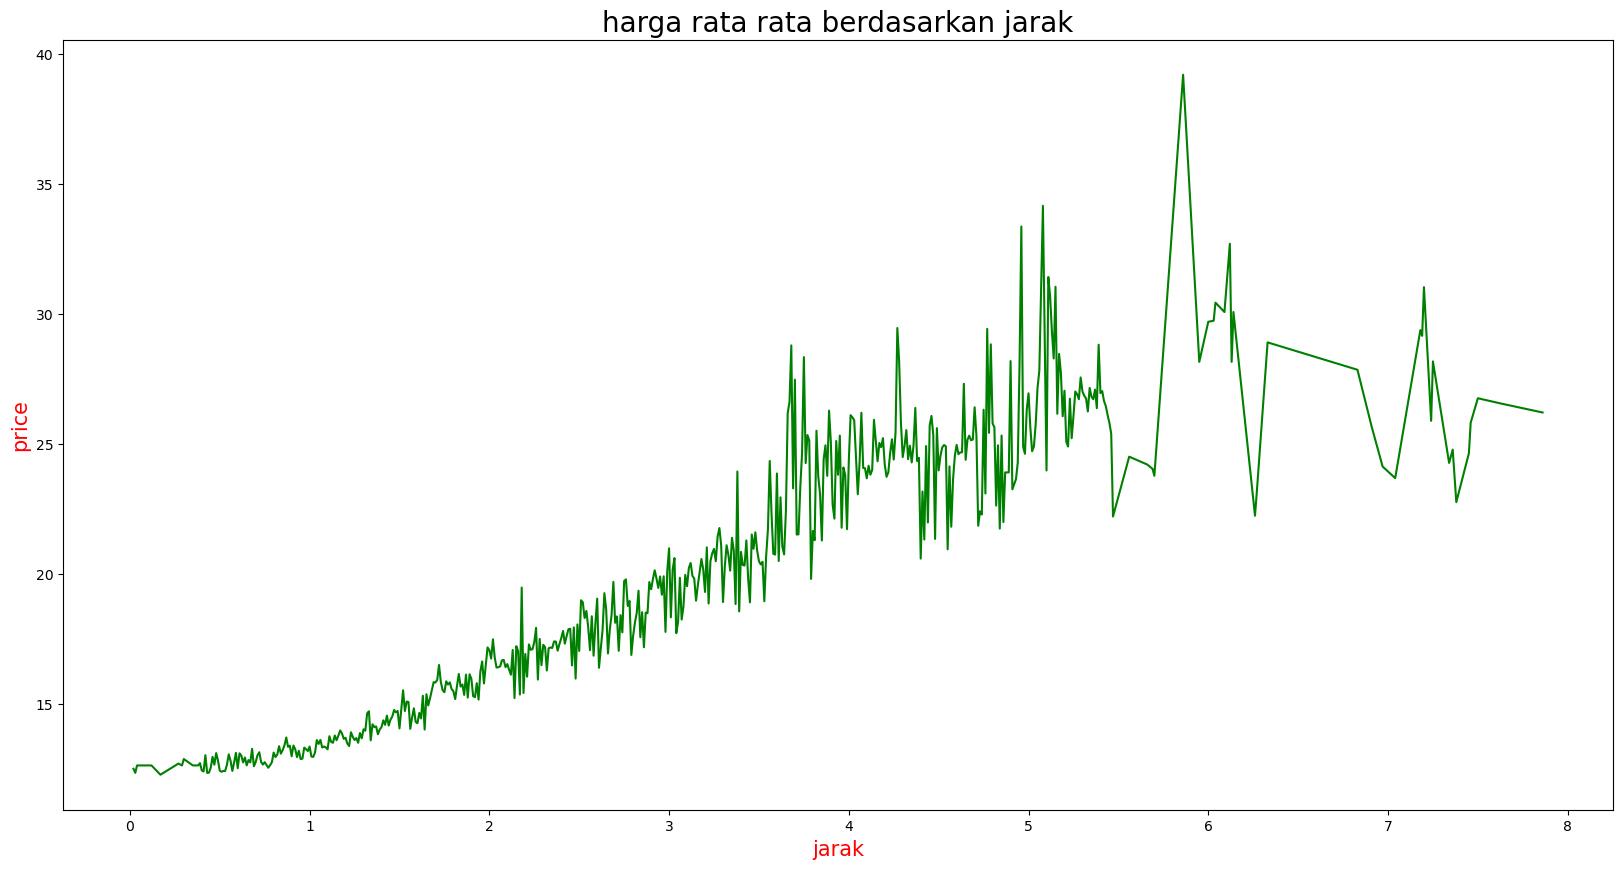

In [196]:
# inisiasi bentuk bar
data_distance.plot(kind = 'line', 
                    figsize=(20,10), 
                    color='green',
                    legend = False)

# nama judul bar chart
plt.title('harga rata rata berdasarkan jarak', fontsize = 20)
# nama xlabel
plt.xlabel('jarak', fontsize = 15, color = "red")
# nama ylabel
plt.ylabel('price', fontsize = 15, color = "red")

# print bar chart
plt.show()

### Kesimpulan Kolom distance terhadap harga
 - Dari rata rata diatas menunjukkan bahwa semakin jauh jaraknya semakin tinggi  harga yang ditetapkan pada kolom price. 
 -  Distance bisa digunakan sebagai featur 

## Analisa surge_multiplier terhadap price

In [197]:
data_cleaning['surge_multiplier'].unique()

array([1.  , 1.25, 2.5 , 2.  , 1.75, 1.5 , 3.  ])

In [198]:
pd.set_option('display.max_rows', 350)
data_surge_multiplier = data_cleaning.groupby(['surge_multiplier'])['price'].mean()

data_surge_multiplier.head()

surge_multiplier
1.00    16.192726
1.25    23.768471
1.50    28.894472
1.75    33.673760
2.00    39.048459
Name: price, dtype: float64

### Kesimpulan Kolom surge_multiplier terhadap harga
 -  Pada data surge_multiplier merupakan data yang berisikan rasio tarif pengganda saat permintaan tinggi
 -  Semakin tinggi surge multipliernya maka semakin tinggi harganya
 -  Dapat dilihat dari data tersebut terdapat range yang sangat besar antara rata rata data terbesar dan terkecil

## Analisa Longitude dan Latitude terhadap price

In [199]:
pd.set_option('display.max_rows', 350)
data_latitude = data_cleaning.groupby(['latitude'])['price'].mean()

data_latitude.head()

latitude
42.2148    16.503949
42.3398    16.477539
42.3429    16.496001
42.3503    16.505915
42.3505    16.664321
Name: price, dtype: float64

In [200]:
pd.set_option('display.max_rows', 350)
data_longitude = data_cleaning.groupby(['longitude'])['price'].mean()

data_longitude.head()

longitude
-71.1054    16.664321
-71.1003    16.496001
-71.0892    16.477539
-71.0810    16.505915
-71.0707    16.539916
Name: price, dtype: float64

### Kesimpulan Kolom longitude dan latitude terhadap harga
 -  Pada data longitude dan latitude memiliki mean yang relatif stabil
 -  Tidak ada perubuahan signifikan terhadap price 

# Kesimpulan Analisa Distance, Surge Multiplier, Titik Awal dan Titik Akhir.
 - Pada data yang berkaitan dengan perjalanan terdiri dari beberapa hal antara lain kolom 'distance', 'destination', 'sourcce', 'surge_multiplier', 'latitude', 'longitude'. 
 - Kolom distance merupakan kolom jarak dimana jarak merupakan perpaduan antara kolom distance dan destination, sedangkan distance sudah cukup untuk mewakili kolom tersebut. 
 - Terdapat pengaruh harga pada saat jarak jauh dan pengaruh saat jarak dekat.
 - Terdapat perubahan harga saat surge multiplier naik dan turun.
 - Dapat disimpulkan bahwa pada kolom surge multiplier dan distance sudah cukup untuk mewakili dari kolom kolom lainnya.
 - Maka surge multiplier dan distance dapat dimasukkan sebagai feature dalam regresi

# Kesimpulan Dari EDA
Pada Explorasi data analysis yang dilakukan mendapatkan beberapa kesimpulan sebagai berikut :
- Dari beberapa kolom dibagi menjadi beberapa hal yang berkaitan antara lain cuaca, jarak, dan waktu
- Dari ketiga bagian tersebut dilakukan analisa apakah memiliki dampak yang signifikan terhadap harga yang ditawarkan yaitu kolom price. 


# Central of Tndency

# Mean

In [201]:
mean_price = data_cleaning['price'].mean()

print('Mean dari kolom price', mean_price)

Mean dari kolom price 16.545125490614062


# Median

In [202]:
median_price = data_cleaning['price'].median()

print('Median dari kolom price', median_price)

Median dari kolom price 16.0


# Mode

In [203]:
mode_name = data_cleaning['name'].mode()

print('Mode dari kolom name', mode_name)

Mode dari kolom name 0    Black SUV
1       UberXL
2          WAV
Name: name, dtype: object


# Data Preprocessing
Data preprocessing merupakan suatu proses untuk melakukan proses sebelum membuat sebuah model. Data data tersebut di proses berdasarkan explorasi data yang sebelumnya dilakukan. 

In [204]:
data_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   timestamp                    693071 non-null  float64       
 1   hour                         693071 non-null  int64         
 2   day                          693071 non-null  int64         
 3   month                        693071 non-null  int64         
 4   datetime                     693071 non-null  datetime64[ns]
 5   source                       693071 non-null  object        
 6   destination                  693071 non-null  object        
 7   cab_type                     693071 non-null  object        
 8   product_id                   693071 non-null  object        
 9   name                         693071 non-null  object        
 10  price                        693071 non-null  float64       
 11  distance                  

Berdasarkan explorasi data sebelumnya ditentukan beberapa hal terpenting antara lain time, cuaca, dan jarak. Ketika data tersebut terdiri dari beberapa kolom dan kami menyimpulkan menjadi beberapa data sesuai dengan explorasi sebelumnya. 

    1. Jarak
         Pada kolom jarak berdasarkan ekplorasi terdiri dari latitude, longtitude, destination, souce distance dan surge multiplier. Kolom kolom tersebut yang berpengaruh terhadap harga adalah distance dan surge multiplier. Kolom distance dan surge multiplier menurut kami sudah cukup mewakili sebuah jarak
    2. Cuaca
        Terdapat banyak kolom yang mengandung unsur unsur dalam cuaca, cuaca tersebut terdiri dari long summary, temperatureHighTime, temperatureLowTime, temperatureMin, temperatureMinTime, temperatureMax, temperatureMaxTime, icon, visibility, short summary dan kolom kolom yang menyangkut cuaca.
        Cuaca cuaca tersebut kami simpulkan bahwa kolom icon dan short summart untuk mewakili cuaca
    3. Hari
        Pada kolom hari kami memasukkan semuanya karena merupakan faktor yang penting
    4. Jenis Layanan
        Pada kolom tersebut terdapat jenis layanan bernama cab_type dan name. Kedua kolom tersebut digunakan untuk model

# Slicing Kolom yang Digunakan Model

In [205]:
data_modeling = data_cleaning.loc[:, ['hour', 'day', 'month', 'distance', 'surge_multiplier', 'icon', 'short_summary', 'cab_type', 'name','price']]
data_modeling

,hour,day,month,distance,surge_multiplier,icon,short_summary,cab_type,name,price
0,9,16,12,0.44,1.0,partly-cloudy-night,Mostly Cloudy,Lyft,Shared,5.000000
1,2,27,11,0.44,1.0,rain,Rain,Lyft,Lux,11.000000
2,1,28,11,0.44,1.0,clear-night,Clear,Lyft,Lyft,7.000000
3,4,30,11,0.44,1.0,clear-night,Clear,Lyft,Lux Black XL,26.000000
4,3,29,11,0.44,1.0,partly-cloudy-night,Partly Cloudy,Lyft,Lyft XL,9.000000
...,...,...,...,...,...,...,...,...,...,...
693066,23,1,12,1.00,1.0,partly-cloudy-night,Partly Cloudy,Uber,UberXL,13.000000
693067,23,1,12,1.00,1.0,partly-cloudy-night,Partly Cloudy,Uber,UberX,9.500000
693068,23,1,12,1.00,1.0,partly-cloudy-night,Partly Cloudy,Uber,Taxi,16.545125
693069,23,1,12,1.00,1.0,partly-cloudy-night,Partly Cloudy,Uber,Black SUV,27.000000


## Encode Data Model

In [206]:
#memberikan label encoder
label_encode = preprocessing.LabelEncoder()

#menyalin data pada variabel cuaca_encode
model_encode = data_modeling.copy()

for col in model_encode.select_dtypes(include='O').columns:
    model_encode[col]=label_encode.fit_transform(data_modeling[col])


In [207]:
model_encode.head()

,hour,day,month,distance,surge_multiplier,icon,short_summary,cab_type,name,price
0,9,16,12,0.44,1.0,5,4,0,7,5.0
1,2,27,11,0.44,1.0,6,8,0,2,11.0
2,1,28,11,0.44,1.0,1,0,0,5,7.0
3,4,30,11,0.44,1.0,1,0,0,4,26.0
4,3,29,11,0.44,1.0,5,6,0,6,9.0


## Melihat korelasi Model

In [208]:
# To find the correlation among
# the columns using pearson method
model_encode.corr(method ='pearson')


,hour,day,month,distance,surge_multiplier,icon,short_summary,cab_type,name,price
hour,1.000000,0.066090,-0.079379,0.002280,-0.000077,-0.041443,0.120234,-0.001257,0.000158,0.000538
day,0.066090,1.000000,-0.861306,-0.000627,0.001389,-0.019885,-0.011329,0.001868,0.000993,-0.000693
month,-0.079379,-0.861306,1.000000,0.002298,-0.000628,-0.073223,-0.024080,-0.000776,-0.000106,0.000876
distance,0.002280,-0.000627,0.002298,1.000000,0.024769,0.001684,0.000636,0.001924,0.000705,0.330038
surge_multiplier,-0.000077,0.001389,-0.000628,0.024769,1.000000,0.000330,-0.002215,-0.169522,-0.081516,0.240220
icon,-0.041443,-0.019885,-0.073223,0.001684,0.000330,1.000000,0.449836,0.002268,-0.000893,0.002015
short_summary,0.120234,-0.011329,-0.024080,0.000636,-0.002215,0.449836,1.000000,-0.000458,-0.001197,0.001194
cab_type,-0.001257,0.001868,-0.000776,0.001924,-0.169522,0.002268,-0.000458,1.000000,0.366068,-0.080464
name,0.000158,0.000993,-0.000106,0.000705,-0.081516,-0.000893,-0.001197,0.366068,1.000000,-0.572357
price,0.000538,-0.000693,0.000876,0.330038,0.240220,0.002015,0.001194,-0.080464,-0.572357,1.000000


## Cek Outlier

<Axes: >

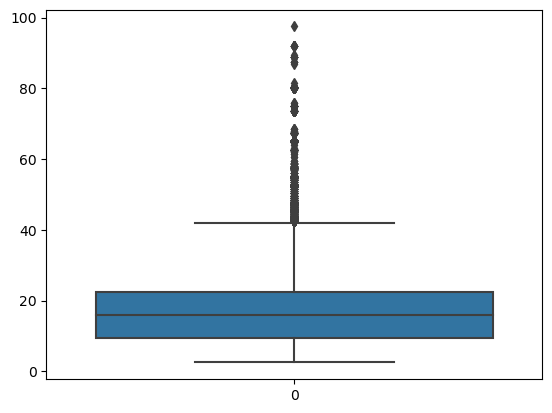

In [209]:
sns.boxplot(model_encode["price"])

In [210]:
sorted(model_encode['price'])


[2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5

In [211]:
quantile1, quantile3= np.percentile(model_encode['price'],[25,75])
## Find the IQR
iqr_value=quantile3-quantile1

print('nilai quartile 1:', quantile1)
print('nilai quartile 3:', quantile3)
print('nilai iqr', iqr_value)

nilai quartile 1: 9.5
nilai quartile 3: 22.5
nilai iqr 13.0


In [212]:
## Find the lower bound value and the higher bound value

lower_bound_val = quantile1 -(1.5 * iqr_value) 
upper_bound_val = quantile3 +(1.5 * iqr_value) 

print(lower_bound_val,upper_bound_val)

-10.0 42.0


In [213]:
#Menghitung data yang outlier pada limit bawah
(model_encode['price'] < lower_bound_val).sum()

0

In [214]:
#Menghitung data yang outlier pada limit atas
(model_encode['price'] > upper_bound_val).sum()

7982

In [215]:
# Dilakukan filter pada data untuk membuang data yang outlier
model_no_outlier = model_encode[(model_encode['price']>lower_bound_val) & (model_encode['price'] < upper_bound_val)]

In [216]:
#Menghitung data yang outlier pada limit atas
(model_no_outlier['price'] > upper_bound_val).sum()

0

<Axes: >

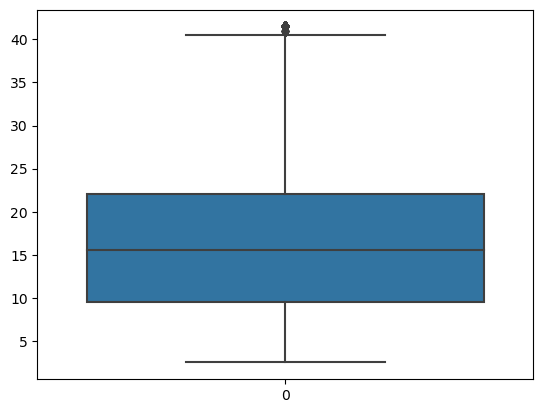

In [217]:
sns.boxplot(model_no_outlier["price"])

# Pelatihan Model

## Skenario 1 Menggunakan encode labeling

In [218]:
data_cleaning.head()

,timestamp,hour,day,month,datetime,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1.544953e+09,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,1.543284e+09,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1.543367e+09,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,1.543554e+09,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,1.543463e+09,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [219]:
regresi_model = data_cleaning.loc[:, [ 'cab_type', 'name', 'distance','surge_multiplier', 'short_summary','price']]
regresi_model

,cab_type,name,distance,surge_multiplier,short_summary,price
0,Lyft,Shared,0.44,1.0,Mostly Cloudy,5.000000
1,Lyft,Lux,0.44,1.0,Rain,11.000000
2,Lyft,Lyft,0.44,1.0,Clear,7.000000
3,Lyft,Lux Black XL,0.44,1.0,Clear,26.000000
4,Lyft,Lyft XL,0.44,1.0,Partly Cloudy,9.000000
...,...,...,...,...,...,...
693066,Uber,UberXL,1.00,1.0,Partly Cloudy,13.000000
693067,Uber,UberX,1.00,1.0,Partly Cloudy,9.500000
693068,Uber,Taxi,1.00,1.0,Partly Cloudy,16.545125
693069,Uber,Black SUV,1.00,1.0,Partly Cloudy,27.000000


### Cek dan Hapus Outlier pada target

<Axes: >

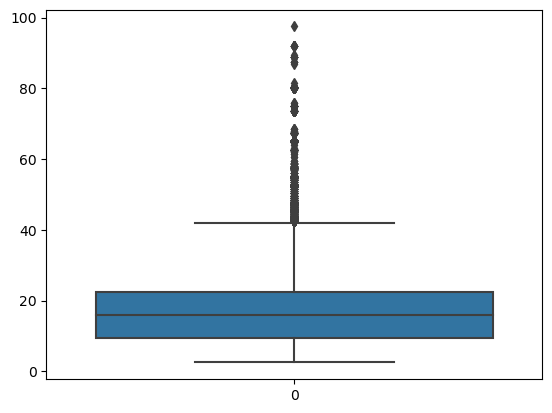

In [220]:

sns.boxplot(regresi_model['price'])

In [221]:
Qp12 = regresi_model['price'].quantile(0.25) # Menghitung kuartil 1 (Q1) dari kolom 'price' dalam dataframe df_modeling dan menyimpannya dalam variabel Qp12
Qp32 = regresi_model['price'].quantile(0.75) # Menghitung kuartil 3 (Q3) dari kolom 'price' dalam dataframe df_modeling dan menyimpannya dalam variabel Qp32
IQRp = Qp32-Qp12 # Menghitung rentang antarkuartil (IQR) dari kolom 'price' dalam dataframe df_modeling dan menyimpannya dalam variabel IQRp
print("Nilai Kuartil 1 : " ,Qp12)
print("Nilai Kuartil 3 : " ,Qp32)
print("Nilai Rentang : " ,IQRp)

Nilai Kuartil 1 :  9.5
Nilai Kuartil 3 :  22.5
Nilai Rentang :  13.0


In [222]:
# Filtering outlier
regresi_model[regresi_model['price'] > (Qp32 + (1.5 * IQRp))].sum()

cab_type            LyftLyftLyftLyftLyftLyftLyftLyftLyftLyftLyftLy...
name                Lux Black XLLux Black XLLyft XLLux BlackLux Bl...
distance                                                      32830.0
surge_multiplier                                              10178.5
short_summary        Overcast  Clear  Overcast  Partly Cloudy  Par...
price                                                       383769.85
dtype: object

In [223]:
# Melakukan filtering pada dataframe new_df berdasarkan kondisi yang diberikan
# Kondisi adalah nilai kolom 'price' harus kurang dari (Qp12 - (1.5 * IQRp))
regresi_model[regresi_model['price']<(Qp12-(1.5*IQRp))].sum()

cab_type            0.0
name                0.0
distance            0.0
surge_multiplier    0.0
short_summary       0.0
price               0.0
dtype: float64

In [224]:
print('Sebelum drop outlier :',regresi_model.shape)
regresi_model= regresi_model[~((regresi_model['price']>(Qp32+(1.5*IQRp))))]
print('Setelah drop outlier :',regresi_model.shape)

Sebelum drop outlier : (693071, 6)
Setelah drop outlier : (685089, 6)


<Axes: >

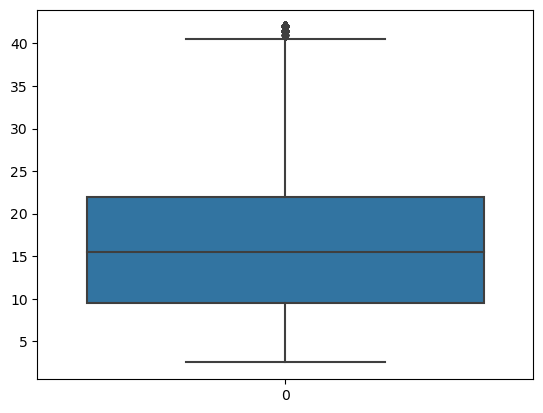

In [225]:

sns.boxplot(regresi_model['price'])

In [226]:
regresi_model.head()

,cab_type,name,distance,surge_multiplier,short_summary,price
0,Lyft,Shared,0.44,1.0,Mostly Cloudy,5.0
1,Lyft,Lux,0.44,1.0,Rain,11.0
2,Lyft,Lyft,0.44,1.0,Clear,7.0
3,Lyft,Lux Black XL,0.44,1.0,Clear,26.0
4,Lyft,Lyft XL,0.44,1.0,Partly Cloudy,9.0


### Label Encode

In [227]:
#ubah menjadi code yang masih berbentuk string
#memberikan label encoder
label_encode = preprocessing.LabelEncoder()

#menyalin data pada variabel cuaca_encode
regresi_model_encode = regresi_model.copy()

for col in regresi_model.select_dtypes(include='O').columns:
     regresi_model_encode[col]=label_encode.fit_transform(regresi_model[col])



In [228]:
regresi_model_encode.head()

,cab_type,name,distance,surge_multiplier,short_summary,price
0,0,7,0.44,1.0,4,5.0
1,0,2,0.44,1.0,8,11.0
2,0,5,0.44,1.0,0,7.0
3,0,4,0.44,1.0,0,26.0
4,0,6,0.44,1.0,6,9.0


### Split data x dan y

In [229]:
X_model = regresi_model_encode.drop(['price'], axis=1)
y_model = regresi_model_encode['price']

X_train_model, X_test_model, y_train_model, y_test_model = train_test_split(X_model, y_model, test_size=0.3)


In [230]:
X_model

,cab_type,name,distance,surge_multiplier,short_summary
0,0,7,0.44,1.0,4
1,0,2,0.44,1.0,8
2,0,5,0.44,1.0,0
3,0,4,0.44,1.0,0
4,0,6,0.44,1.0,6
...,...,...,...,...,...
693066,1,11,1.00,1.0,6
693067,1,10,1.00,1.0,6
693068,1,8,1.00,1.0,6
693069,1,1,1.00,1.0,6


In [231]:
y_model

0          5.000000
1         11.000000
2          7.000000
3         26.000000
4          9.000000
            ...    
693066    13.000000
693067     9.500000
693068    16.545125
693069    27.000000
693070    10.000000
Name: price, Length: 685089, dtype: float64

### Linear Regression

In [232]:
LinReg = LinearRegression()

In [233]:
LinReg.fit(X_train_model, y_train_model)

LinearRegression()

In [234]:
y_predict = LinReg.predict(X_test_model)
r_sq_test = LinReg.score(X_test_model, y_test_model)
print(' score coefisient of determination', r_sq_test)

 score coefisient of determination 0.48564132740621513


In [235]:
model_regresi1 = LinReg.fit(X_train_model, y_train_model)
y_pred_model = model_regresi1.predict(X_test_model)

### Hasil

In [236]:
mse_model = mean_squared_error(y_test_model, y_pred_model)  # Menghitung Mean Squared Error (MSE)
rmse_model = np.sqrt(mse_model)  # Menghitung akar kuadrat dari MSE, yang merupakan Root Mean Squared Error (RMSE)
print(r2_score(y_test_model, y_pred_model)*100)  # Menghitung R-squared (koefisien determinasi) dan mencetak hasilnya dalam persentase
print(mse_model)  # Mencetak nilai MSE
print(rmse_model)  # Mencetak nilai RMSE

48.56413274062151
35.231659629067444
5.935626304701758


### Keterangan Skenario 1
pada hasil skenario satu dengan menggunakan label encode didapatkan hasil yang rendah yaitu hanya sebesar 45%

## Skenario 2 One Encode

In [237]:
data_cleaning.head()

,timestamp,hour,day,month,datetime,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1.544953e+09,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,1.543284e+09,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1.543367e+09,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,1.543554e+09,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,1.543463e+09,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [238]:
mean = data_cleaning['price'].mean()
std = data_cleaning['price'].std()
print(mean)
print(std)

16.545125490614062
8.946069063710608


In [239]:
data_cleaning['price'].isnull().sum()

0

In [240]:
data_cleaning.shape

(693071, 54)

In [241]:
coba = data_cleaning.copy()

In [242]:
coba.head()

,timestamp,hour,day,month,datetime,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1.544953e+09,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,1.543284e+09,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1.543367e+09,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,1.543554e+09,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,1.543463e+09,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


### Slicing data yang digunakan untuk regression

In [243]:
coba = data_cleaning.loc[:, [ 'cab_type', 'name', 'distance','surge_multiplier', 'short_summary','price']]
coba.head()

,cab_type,name,distance,surge_multiplier,short_summary,price
0,Lyft,Shared,0.44,1.0,Mostly Cloudy,5.0
1,Lyft,Lux,0.44,1.0,Rain,11.0
2,Lyft,Lyft,0.44,1.0,Clear,7.0
3,Lyft,Lux Black XL,0.44,1.0,Clear,26.0
4,Lyft,Lyft XL,0.44,1.0,Partly Cloudy,9.0


### Membuat one encoder

In [244]:
nums = [i for i in coba.columns if coba[i].dtypes != 'object']
cats = [i for i in coba.columns if coba[i].dtypes == 'object']

In [245]:
coba_encode = pd.get_dummies(coba, columns=(cats))
coba_encode.head()

,distance,surge_multiplier,price,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
0,0.44,1.0,5.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.44,1.0,11.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.44,1.0,7.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0.44,1.0,26.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0.44,1.0,9.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [246]:
coba_encode['price'].isnull().sum()

0

### Handle Outlier

<Axes: >

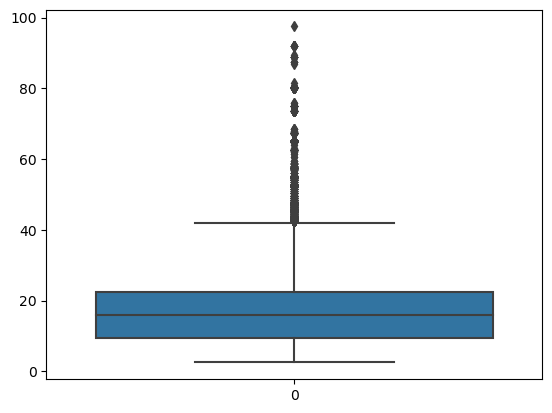

In [247]:

sns.boxplot(coba_encode['price'])

In [248]:
sorted(coba_encode['price'])


[2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5

In [249]:
Qp12 = coba_encode['price'].quantile(0.25) # Menghitung kuartil 1 (Q1) dari kolom 'price' dalam dataframe df_modeling dan menyimpannya dalam variabel Qp12
Qp32 = coba_encode['price'].quantile(0.75) # Menghitung kuartil 3 (Q3) dari kolom 'price' dalam dataframe df_modeling dan menyimpannya dalam variabel Qp32
IQRp = Qp32-Qp12 # Menghitung rentang antarkuartil (IQR) dari kolom 'price' dalam dataframe df_modeling dan menyimpannya dalam variabel IQRp
print("Nilai Kuartil 1 : " ,Qp12)
print("Nilai Kuartil 3 : " ,Qp32)
print("Nilai Rentang : " ,IQRp)

Nilai Kuartil 1 :  9.5
Nilai Kuartil 3 :  22.5
Nilai Rentang :  13.0


In [250]:
print('Sebelum drop outlier :',coba_encode.shape)
coba_encode= coba_encode[~((coba_encode['price']>(Qp32+(1.5*IQRp))))]
print('Setelah drop outlier :',coba_encode.shape)

Sebelum drop outlier : (693071, 27)
Setelah drop outlier : (685089, 27)


<Axes: >

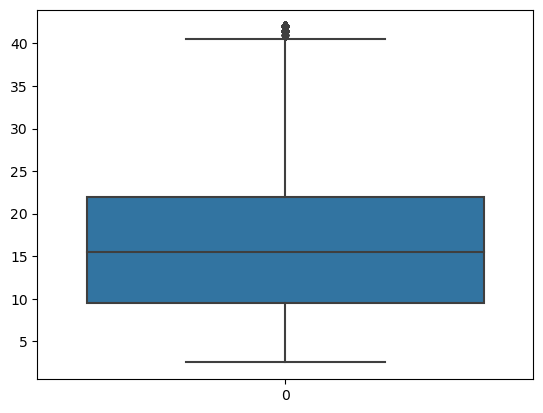

In [251]:

sns.boxplot(coba_encode['price'])

In [252]:
coba_encode.head()

,distance,surge_multiplier,price,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
0,0.44,1.0,5.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.44,1.0,11.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.44,1.0,7.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0.44,1.0,26.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0.44,1.0,9.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Linear Regression

In [253]:
X_model_encode = coba_encode.drop(['price'], axis=1)
y_model_encode = coba_encode['price']

X_train_encode, X_test_encode, y_train_encode, y_test_encode = train_test_split(X_model_encode, y_model_encode, test_size=0.3)


In [254]:
model_encode = LinReg.fit(X_train_encode,y_train_encode)
y_pred_encode=model_encode.predict(X_test_encode)

### Score

In [255]:
mse_encode = mean_squared_error(y_test_encode, y_pred_encode)  # Menghitung Mean Squared Error (MSE)
rmse_encode = np.sqrt(mse_encode)  # Menghitung akar kuadrat dari MSE, yang merupakan Root Mean Squared Error (RMSE)
print(r2_score(y_test_encode, y_pred_encode)*100)  # Menghitung R-squared (koefisien determinasi) dan mencetak hasilnya dalam persentase
print(mse_encode)  # Mencetak nilai MSE
print(rmse_encode)  # Mencetak nilai RMSE

92.24524406933575
5.319861811374168
2.306482562555843


In [256]:
coef = LinReg.coef_
intercept = LinReg.intercept_
print('intercept :', LinReg.intercept_)
print('slope :', LinReg.coef_)

intercept : 574365119031.2997
slope : [ 2.39986644e+00  1.31109179e+01 -1.19457213e+12 -1.23118289e+12
 -2.87258466e+10 -2.87258466e+10 -6.53366103e+10 -6.53366103e+10
 -6.53366103e+10 -6.53366103e+10 -6.53366103e+10 -6.53366103e+10
 -2.87258466e+10 -2.87258467e+10 -2.87258467e+10 -2.87258466e+10
 -2.87258467e+10  6.85543622e+11  6.85543622e+11  6.85543622e+11
  6.85543622e+11  6.85543622e+11  6.85543622e+11  6.85543622e+11
  6.85543622e+11  6.85543622e+11]


In [257]:
y_pred_encode

array([ 7.2590332 , 19.07165527, 31.2364502 , ..., 20.81213379,
       14.23156738,  7.28137207])

### Regression Plot

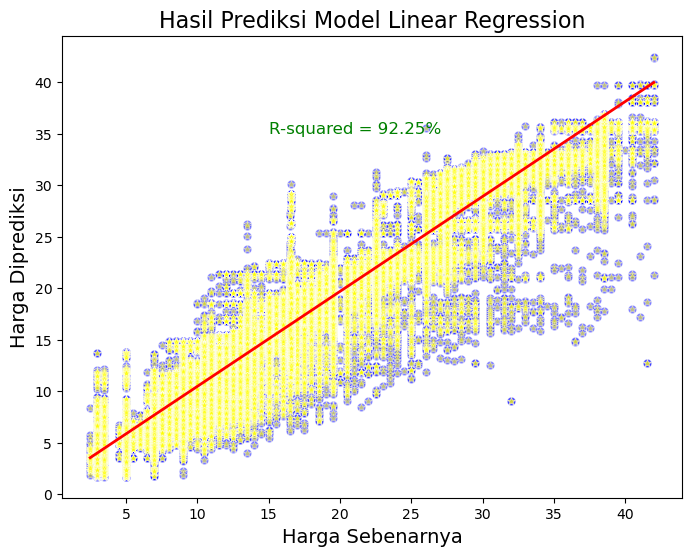

In [258]:
condition = (y_test_encode < 50) # kondisi untuk subset pertama
subset1_x = y_test_encode
subset1_y = y_pred_encode

subset2_x = y_test_encode
subset2_y = y_pred_encode

# Buat scatter plot untuk setiap subset dengan marker yang berbeda
plt.figure(figsize=(8,6))
sns.scatterplot(x=subset1_x, y=subset1_y, color='blue', alpha=0.5, marker='o')
sns.scatterplot(x=subset2_x, y=subset2_y, color='yellow', alpha=0.5, marker='*')

# Menambahkan garis regresi untuk seluruh data
sns.regplot(x=y_test_encode, y=y_pred_encode, color='red', scatter=False, line_kws={'lw':2})

plt.title('Hasil Prediksi Model Linear Regression', fontsize=16)
plt.xlabel('Harga Sebenarnya', fontsize=14)
plt.ylabel('Harga Diprediksi', fontsize=14)

# Menambahkan anotasi
plt.text(15, 35, f'R-squared = {round(r2_score(y_test_encode, y_pred_encode)*100, 2)}%', fontsize=12, color='green')

plt.show()

# Kesimpulan

Dari 2 evaluasi model yang telah dilakukan terdapat hasil mse yang perbedaannya sangat signifikan. Hal ini dikarenakan pada percobaan pertama yaitu saat msenya berniali 48% digunakan LabelEncoder pada sumbu X-nya  sedangkan pada percobaan kedua yaitu saat msenya dihasilkan sebesar 92,32% pada sumbu X digunakan metode OneEncoder. Sehingga dapat disimpulkan pada LinearRegression untuk menghasilkan nilai mse yang besar lebih baik sehingga modelnya lebih akurat maka digunakan metode OneEncoder pada sumbu X-nya  

# Model Inference
Data Random

In [259]:
test_data = {'distance':[10, 25, 20], 'surge_multiplier':[2, 2, 3],
          'cab_type_Lyft':[0, 1, 0], 'cab_type_Uber':[1, 0, 1], 'name_Black':[0, 0, 0], 'name_Black SUV':[0, 0, 0],
          'name_Lux':[0, 0, 0], 'name_Lux Black':[0, 0, 0], 'name_Lux Black XL':[0, 0, 0], 'name_Lyft':[0, 1, 0],
          'name_Lyft XL':[0, 0, 0], 'name_Shared':[0, 0, 0], 'name_Taxi':[0,0,0], 'name_UberPool':[0, 0, 0],
         'name_UberX': [1, 0, 0],  'name_UberXL':[0, 0, 1], 'name_WAV':[0, 0, 0], 'short_summary_ Clear ':[1,0,1], 
          'short_summary_ Drizzle ':[0,1,1], 'short_summary_ Foggy ':[1,0,0], 'short_summary_ Light Rain ':[1,1,1],
          'short_summary_ Mostly Cloudy ':[0,0,0], 'short_summary_ Overcast ':[1,1,0], 
         'short_summary_ Partly Cloudy ':[0,0,1],'short_summary_ Possible Drizzle ':[1,1,1], 'short_summary_ Rain ':[1,0,1]
        }
test_data = pd.DataFrame(test_data)
test_data

,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
0,10,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,25,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
2,20,3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,1,1


In [260]:
predict_test = model_encode.predict(test_data)
predict_test

array([3.42771811e+12, 2.05663087e+12, 3.42771811e+12])

#    KESIMPULAN SELURUH HASIL PENGOLAHAN
    
    Berdasarkan analisis month terhadap price didapatkan month tidak mempengaruhi  harga secara signifikan kemudian berdasarkan analisis day, hour dan cuaca disimpulkan bahwa ketiga variabel ini tidak mempengaruhi rata-rata harga secara signifikan namun ketiganya mempengaruhi jumlah orderan yang diterima. Kemudian variabel lain yang mempengaruhi harga adalah jenis perusahaanya dan jenis pelayanannya. Berdasarakan analisis yang telah dilakukan kebanyakan orang-orang lebih memilih uber sebagai jasa transportasi karena harganya yang lebih murah. Berdasarkan jenis armadanya rata-rata harga tertinggi berada pada armada tipe lux Black XL dimana ini adalah armada yang terbagus sehingga dapat disimpulkan semakin bagus armada maka harganya juga semakin mahal. Kemudian berdasarkan jaraknya harga akan semakin mahal jika jarak yang ditempuh semakin jauh.   
    Pada model inference dengan menggunakan data random yang dibuat dengan data yang sesuai dengan kolom kolom tersebut. Data data tersebut menghasilkan sebuah output yang merupakan hasil dari kolom price.
  

In [1]:
echo".gitignore" > .gitignore